# AgeGuess Project 
https://www.nature.com/articles/s41597-019-0245-9

In [1]:
#Import libraries
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import gridspec
import seaborn as sns
import numpy as np
from pandas import DataFrame, read_csv   #conda install -c anaconda xlrd
import functools
from functools import reduce




In [2]:
#library for build repots
from pandas_profiling import ProfileReport

# 1. Importing the data

In [3]:
# load the data AgeGuess
df_gamers = pd.read_csv('ag_gamers.csv')
df_guess = pd.read_csv('ag_guess.csv')
df_photos = pd.read_csv('ag_photos.csv')


# 2. Undestanding the data - Dataframe information

### 2.2. Index and variables meaning

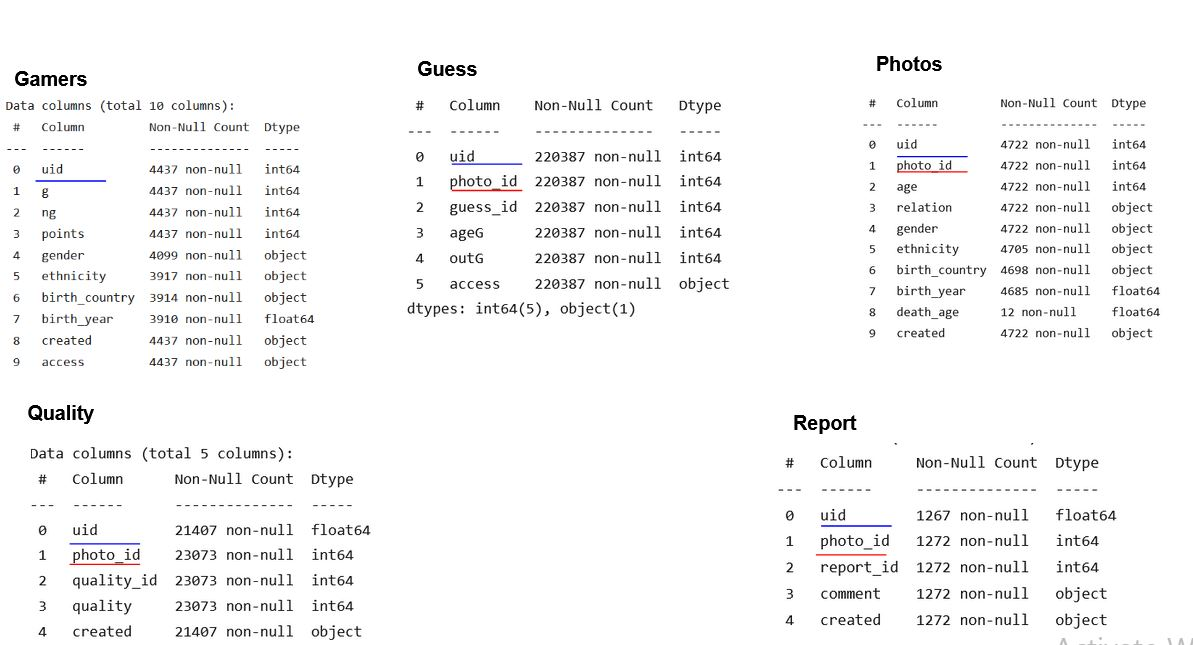

In [4]:
from IPython.display import display, Image
display(Image(filename='Id_connections.JPG'))

#### Gamers Variables 

- (uid) individual identifier of the user 
- (g) number of correct guesses the user made 
- (ng) number of other guesses 
- (points)points gained in the online game
- (gender), (ethnicity), (birth country) and (birth year) is users’ basic demographic information
- (access) when the user last logged 
- (created)  when the user created an account with AgeGuess
- variables store the timestamp in date and time UTC + 1:00 

#### Guess Variables 

- (uid) individual identifiers of the user who made the guess
- (guess_id) the guess itself
- (photo_id) the photograph guessed 
- (ageG) guessed age
- (outG) the deviation in the guess from the real age in years
- (access) date and time UTC + 1:00 in the format ‘YYYY-MM-DD HH:MM:SS’


#### Photos Variables 
- (uid) individual identifiers the user who uploaded the photograph 
- (photo_id variables) Id for  the photograph uploaded.
- (relation) variable indicates whether the photograph is of the user or of another person to which the user has a relation (categories: user, unrelated of friend, mother/father, son/daughter, sibling, half sibling, maternal/paternal grandparent, maternal/paternal aunt/uncle, maternal/paternal cousin, grandchild). 
- (gender),( ethnicity), (birth_country), (birth_year), (death_age) variables contain the respective basic demographic information for the person in the photograph. 
- (created) variable stores the timestamp when the photograph was added in date and time UTC + 1:00 ‘YYYY-MM-DD HH:MM:SS’.

#### Quality Variables 
- (uid), the individual identifier of the user who made the assessment,
- (quality_id) quality assessment
- (photo_id) identifier of the photo on which the assessment was made
- (quality) Quality itself is encoded as 1 = high, 2 = medium, 3 = low 
- (created)  timestamps of the assessment in formats described above 



# Gamers Database

## Building the Report 

In [5]:
#report_gamers = ProfileReport(df_gamers, title="Guess Report")
#report_gamers

## Knowing the values inside the variables

In [6]:
df_gamers.columns

Index(['uid', 'g', 'ng', 'points', 'gender', 'ethnicity', 'birth_country',
       'birth_year', 'created', 'access'],
      dtype='object')

In [7]:
df_gamers["gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [8]:
df_gamers["ethnicity"].unique()

array(['Caucasian/White', nan, 'Black', 'Hispanic', 'Other', 'Asian'],
      dtype=object)

## Cleaning the data

-Change country names

In [9]:
#After checking the country names, the database has some countries, characteres and bad names 
#remplacing names of the countries
df_gamers['birth_country'] = df_gamers['birth_country'].replace(['Per�'],'Peru')
df_gamers['birth_country'] = df_gamers['birth_country'].replace(['Panam�'],'Panama')

-Drop columns

In [10]:
gamers_c= df_gamers.copy()

In [11]:
gamers_c.columns

Index(['uid', 'g', 'ng', 'points', 'gender', 'ethnicity', 'birth_country',
       'birth_year', 'created', 'access'],
      dtype='object')

In [12]:
#Removing featuring 

def remove_features(gamers_c):
    return gamers_c.drop(columns=[
        'points',
        "created",
        "access"])
gamers_c=remove_features(gamers_c)
print(gamers_c.shape)

#Don´t run after remove the columns 

(4437, 7)


-Looking Outliers

In [13]:
# looking  outliers 
gamers_outlier = gamers_c.loc[gamers_c ["birth_year"] <=1924,:] #give the filter for the data


In [14]:
gamers_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1480 to 4093
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            12 non-null     int64  
 1   g              12 non-null     int64  
 2   ng             12 non-null     int64  
 3   gender         12 non-null     object 
 4   ethnicity      12 non-null     object 
 5   birth_country  12 non-null     object 
 6   birth_year     12 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 768.0+ bytes


### - Remove outliers

In [15]:
# Remove outliers in a datafram. Outliers defined as values greater than 99.5th percentile
# Remover values in column
gamer_c1 = gamers_c.drop(gamers_c[gamers_c['birth_year']<= 1924.0].index)
gamer_c1. shape

(4425, 7)

# Guess Database

### Building a report

In [16]:
report_guess = ProfileReport(df_guess, title="Guess Report")
report_guess

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Cleaning the data 

In [17]:
#I always do a copy before drop columns 
guess_c= df_guess.copy()

In [18]:
guess_c.columns

Index(['uid', 'photo_id', 'guess_id', 'ageG', 'outG', 'access'], dtype='object')

-Drop columns 

In [19]:
#Removing featuring 

def remove_features(guess_c):
    return guess_c.drop(columns=[
           "access"])
guess_c=remove_features(guess_c)
print(guess_c.shape)

#Don´t run after remove the columns 

(220387, 5)


## Looking outliers

In [20]:
#looking for outliers --- I decide don't remove because there are only 65 rows
guess_long1 = guess_c.loc[guess_c ["outG"] <=-30,:] #give the filter for the data
guess_long1

uid  photo_id  guess_id  ageG  outG
25223    289     31589     10584    18   -30
25224    320     31589     11375    18   -30
25294   3184     31589    145524    18   -30
45924    837     54213     28264    29   -30
72486   2011     83466     72965    67   -33
...      ...       ...       ...   ...   ...
184788     3    211909    176815    22   -31
184817  3696    211909    182426    23   -30
210407     3    242793    228237    24   -32
210410  4173    242793    228649    25   -31
210413  4176    242793    229110    26   -30

[65 rows x 5 columns]

#  Photos Database

In [21]:
report_photos = ProfileReport(df_photos, title="Photos Report")
report_photos

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Drop columns 

In [22]:
## Drop columns 
photos_c = df_photos.copy()

In [23]:
photos_c.columns

Index(['uid', 'photo_id', 'age', 'relation', 'gender', 'ethnicity',
       'birth_country', 'birth_year', 'death_age', 'created'],
      dtype='object')

In [24]:
#Removing featuring 

def remove_features(photos_c):
    return photos_c.drop(columns=[
           'uid', 
           'relation',
           'death_age',
           "created"])
photos_c=remove_features(photos_c)
print(photos_c.shape)

#Don´t run after remove the columns 

(4722, 6)


In [25]:
photos_c['birth_country'].unique()

array(['France', 'United States', 'Croatia', 'Ireland', 'Switzerland',
       'Germany', 'Argentina', 'Peru', 'Estonia', 'Italy', 'Sweden',
       'Brazil', 'Netherlands', 'Spain', 'United Kingdom', 'Canada',
       'Oman', 'Morocco', 'Panama', 'Israel', 'New Zealand', 'Japan',
       'Taiwan', 'Portugal', 'India', 'Poland', 'Serbia', 'Hungary',
       'Vietnam', 'Macedonia', 'Iran', 'Norway', 'Denmark', 'Guinea',
       'Belgium', 'united', 'Colombia', 'Uruguay', nan, 'Panam�',
       'Bolivia', 'Egypt', 'Philippines', 'Greece', 'Indonesia',
       'Czech Republic', 'Madagascar', 'Angola', 'Slovenia', 'Venezuela',
       'VE', 'China', 'Slovakia', 'South Africa', 'Hong Kong', 'Pakistan',
       'Fiji Islands', 'Lithuania', 'South Korea', 'Uzbekistan',
       'Malaysia', 'Ghana', 'Bulgaria', 'Alamo', 'Puerto-Rico', 'Syria',
       'United Arab Emirates', 'Jordan', 'Saudi Arabia', 'Reunion',
       'Sri Lanka', 'Mexico', 'Australia', 'Mozambique', 'Niger', 'Chile',
       'Murica', 'Gua

In [26]:
#the database has some countries bad spelling, characteres and bad names 
#remplacing names of the countries

photos_c['birth_country'] = photos_c['birth_country'].replace(['Per�'],'Peru')
photos_c['birth_country'] = photos_c['birth_country'].replace(['Panam�'],'Panama')

In [27]:
photos_c['birth_country'].unique()

array(['France', 'United States', 'Croatia', 'Ireland', 'Switzerland',
       'Germany', 'Argentina', 'Peru', 'Estonia', 'Italy', 'Sweden',
       'Brazil', 'Netherlands', 'Spain', 'United Kingdom', 'Canada',
       'Oman', 'Morocco', 'Panama', 'Israel', 'New Zealand', 'Japan',
       'Taiwan', 'Portugal', 'India', 'Poland', 'Serbia', 'Hungary',
       'Vietnam', 'Macedonia', 'Iran', 'Norway', 'Denmark', 'Guinea',
       'Belgium', 'united', 'Colombia', 'Uruguay', nan, 'Bolivia',
       'Egypt', 'Philippines', 'Greece', 'Indonesia', 'Czech Republic',
       'Madagascar', 'Angola', 'Slovenia', 'Venezuela', 'VE', 'China',
       'Slovakia', 'South Africa', 'Hong Kong', 'Pakistan',
       'Fiji Islands', 'Lithuania', 'South Korea', 'Uzbekistan',
       'Malaysia', 'Ghana', 'Bulgaria', 'Alamo', 'Puerto-Rico', 'Syria',
       'United Arab Emirates', 'Jordan', 'Saudi Arabia', 'Reunion',
       'Sri Lanka', 'Mexico', 'Australia', 'Mozambique', 'Niger', 'Chile',
       'Murica', 'Guacamole ', 

In [28]:
### para cambiar los nombres se puede hacer: 
#cambiar VE, Gucamole y otros a NaN
#Revisar la lista de nombre de ISO-CODE

# Merging databases

Please make a note that while combining normal dataframe to geodataframe we have used geodataframe first in merge operation. The main reason for doing so is that it'll output GeoDataFrame as output else it'll output normal pandas dataframe as output without geo functionalities. Please make a note that there will be few NANs present in the dataframe because we don't have happiness data for all countries of the world.

In [29]:
photos_c.columns

Index(['photo_id', 'age', 'gender', 'ethnicity', 'birth_country',
       'birth_year'],
      dtype='object')

In [30]:
guess_c.columns

Index(['uid', 'photo_id', 'guess_id', 'ageG', 'outG'], dtype='object')

In [31]:
photos_guess = photos_c.merge(guess_c, how="left", left_on=['photo_id'], right_on=['photo_id'])
photos_guess.head()

photo_id  age gender        ethnicity birth_country  birth_year  uid  \
0       243   26   Male  Caucasian/White        France         NaN  6.0   
1       243   26   Male  Caucasian/White        France         NaN  5.0   
2       243   26   Male  Caucasian/White        France         NaN  3.0   
3       243   26   Male  Caucasian/White        France         NaN  8.0   
4       243   26   Male  Caucasian/White        France         NaN  9.0   

   guess_id  ageG  outG  
0      10.0  28.0   2.0  
1      12.0  26.0   0.0  
2      37.0  25.0  -1.0  
3      50.0  23.0  -3.0  
4      67.0  28.0   2.0

In [32]:
#change the columns names 

photos_guess.rename(columns = {"age": "age_p",'gender': "gender_p", "ethnicity" : "ethn_p","birth_country" : "birth_c_p", 'birth_year': 'birth_y_p'  }, inplace=True)
photos_guess

photo_id  age_p gender_p           ethn_p       birth_c_p  birth_y_p  \
0            243     26     Male  Caucasian/White          France        NaN   
1            243     26     Male  Caucasian/White          France        NaN   
2            243     26     Male  Caucasian/White          France        NaN   
3            243     26     Male  Caucasian/White          France        NaN   
4            243     26     Male  Caucasian/White          France        NaN   
...          ...    ...      ...              ...             ...        ...   
220453    255125     18     Male  Caucasian/White  Czech Republic     2000.0   
220454    255126     18     Male  Caucasian/White  Czech Republic     2000.0   
220455    255128     18     Male  Caucasian/White  Czech Republic     2000.0   
220456    255130     17     Male  Caucasian/White        Portugal     2001.0   
220457    255131     30     Male  Caucasian/White   United States     1987.0   

        uid  guess_id  ageG  outG  
0       6.0      10.0  28.0   2.0  
1       5.0      12.0  26.0   0.0  
2       3.0      37.0  25.0  -1.0  
3       8.0      50.0  23.0  -3.0  
4       9.0      67.0  28.0   2.0  
...     ...       ...   ...   ...  
220453  NaN       NaN   NaN   NaN  
220454  NaN       NaN   NaN   NaN  
220455  NaN       NaN   NaN   NaN  
220456  NaN       NaN   NaN   NaN  
220457  NaN       NaN   NaN   NaN  

[220458 rows x 10 columns]

In [33]:
photos_guess.rename(columns = {"age_p": "age_r"  }, inplace=True)

In [34]:
photos_guess.rename(columns = {"outG": "Error"  }, inplace=True)

In [95]:
# Drop the photos without guess 
# Drop all rows with NaNs in A
photos_guess.dropna(subset=['ageG'])


photo_id  age_r gender_p           ethn_p      birth_c_p  birth_y_p  \
2339        5204     23   Female  Caucasian/White        Croatia     1983.0   
2340        5204     23   Female  Caucasian/White        Croatia     1983.0   
2341        5204     23   Female  Caucasian/White        Croatia     1983.0   
2342        5204     23   Female  Caucasian/White        Croatia     1983.0   
2343        5204     23   Female  Caucasian/White        Croatia     1983.0   
...          ...    ...      ...              ...            ...        ...   
220438    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
220439    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
220440    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
220441    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
220442    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   

           uid  guess_id  ageG  Error  age_copy  E_abs  
2339       8.0     507.0  24.0    1.0        23    1.0  
2340      23.0     516.0  20.0   -3.0        23    3.0  
2341      13.0     524.0  20.0   -3.0        23    3.0  
2342      14.0     538.0  19.0   -4.0        23    4.0  
2343      24.0     543.0  25.0    2.0        23    2.0  
...        ...       ...   ...    ...       ...    ...  
220438  4432.0  254911.0  24.0   -4.0        28    4.0  
220439  3422.0  254990.0  26.0   -2.0        28    2.0  
220440  4376.0  255066.0  22.0   -6.0        28    6.0  
220441  4427.0  255085.0  21.0   -7.0        28    7.0  
220442  4434.0  255112.0  19.0   -9.0        28    9.0  

[215976 rows x 12 columns]

In [96]:
# around 60 photos were eliminated 

In [98]:
#create a new column with the data of age real for draw in the charts
photos_guess['age_copy'] = photos_guess['age_r'] 

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Creating the column for Error Absolute

In [99]:
photos_guess['E_abs'] = photos_guess['Error'].abs()
photos_guess

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


photo_id  age_r gender_p           ethn_p      birth_c_p  birth_y_p  \
2339        5204     23   Female  Caucasian/White        Croatia     1983.0   
2340        5204     23   Female  Caucasian/White        Croatia     1983.0   
2341        5204     23   Female  Caucasian/White        Croatia     1983.0   
2342        5204     23   Female  Caucasian/White        Croatia     1983.0   
2343        5204     23   Female  Caucasian/White        Croatia     1983.0   
...          ...    ...      ...              ...            ...        ...   
220438    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
220439    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
220440    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
220441    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
220442    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   

           uid  guess_id  ageG  Error  age_copy  E_abs  
2339       8.0     507.0  24.0    1.0        23    1.0  
2340      23.0     516.0  20.0   -3.0        23    3.0  
2341      13.0     524.0  20.0   -3.0        23    3.0  
2342      14.0     538.0  19.0   -4.0        23    4.0  
2343      24.0     543.0  25.0    2.0        23    2.0  
...        ...       ...   ...    ...       ...    ...  
220438  4432.0  254911.0  24.0   -4.0        28    4.0  
220439  3422.0  254990.0  26.0   -2.0        28    2.0  
220440  4376.0  255066.0  22.0   -6.0        28    6.0  
220441  4427.0  255085.0  21.0   -7.0        28    7.0  
220442  4434.0  255112.0  19.0   -9.0        28    9.0  

[215976 rows x 12 columns]

The ageG and outG variables describe the guessed age and the deviation in the guess from the real age in years, respectively. Error is not a variable accurate, only explain the bias in some cases but when is used as MEAN, the positive and negative values canceled between them. For this reason is better to use the Mean Absolute Error

In [100]:
photos_guess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215976 entries, 2339 to 220442
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   photo_id   215976 non-null  int64  
 1   age_r      215976 non-null  int64  
 2   gender_p   215976 non-null  object 
 3   ethn_p     215976 non-null  object 
 4   birth_c_p  215976 non-null  object 
 5   birth_y_p  215976 non-null  float64
 6   uid        215976 non-null  float64
 7   guess_id   215976 non-null  float64
 8   ageG       215976 non-null  float64
 9   Error      215976 non-null  float64
 10  age_copy   215976 non-null  int64  
 11  E_abs      215976 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 21.4+ MB


#### Erase row with NaN value

In [102]:
photos_guess = photos_guess.dropna()

 Advice to get better acurrcy and quality data

 - From the Guess data we delete all guesses that are more than two times the standard deviation away from the mean age guess on a photograph. We further remove all guesses on photographs that have less than 10 guesses

 - Exclude photos with less than 10 guesses to improve data quality.

## How gender, ethnicity affects age guessing in humans?

In [104]:
#First consider the target gender influence on guessing apparent age

In [105]:
photos_guess.columns

Index(['photo_id', 'age_r', 'gender_p', 'ethn_p', 'birth_c_p', 'birth_y_p',
       'uid', 'guess_id', 'ageG', 'Error', 'age_copy', 'E_abs'],
      dtype='object')

In [106]:
photos_guess['gender_p'].unique()

array(['Female', 'Male'], dtype=object)

## Gender Dataframe

In [107]:
female_picture = photos_guess[photos_guess['gender_p'] == 'Female'].groupby('age_r').agg({"ageG": "mean","age_copy":"mean",'Error': "mean"  }).round()
female_picture = female_picture.reset_index()
#female_picture .columns = [' '.join(col) for col in female_picture.columns.values]
female_picture


age_r  ageG  age_copy  Error
0       3  10.0         3    7.0
1       4  10.0         4    6.0
2       5   8.0         5    3.0
3       6   9.0         6    3.0
4       7   9.0         7    2.0
..    ...   ...       ...    ...
67     71  68.0        71    1.0
68     83  76.0        83   -7.0
69     88  74.0        88  -14.0
70     89  82.0        89   -7.0
71    100  81.0       100  -19.0

[72 rows x 4 columns]

### Visualizing the Gender in the image and the percepcion of the age 

In [48]:
male_picture = photos_guess[photos_guess['gender_p'] == 'Male'].groupby(['age_r']).agg({"ageG": "mean","age_copy":"mean"}).round()
male_picture = male_picture.reset_index()
#female_picture .columns = [' '.join(col) for col in female_picture.columns.values]
male_picture

age_r  ageG  age_copy
0       5   7.0         5
1       6  10.0         6
2       7  10.0         7
3      10  11.0        10
4      11  13.0        11
..    ...   ...       ...
65     72  68.0        72
66     75  71.0        75
67     78  73.0        78
68     79  68.0        79
69     80  70.0        80

[70 rows x 3 columns]

Text(0.5, 0.98, 'Gender influence in Age perception')

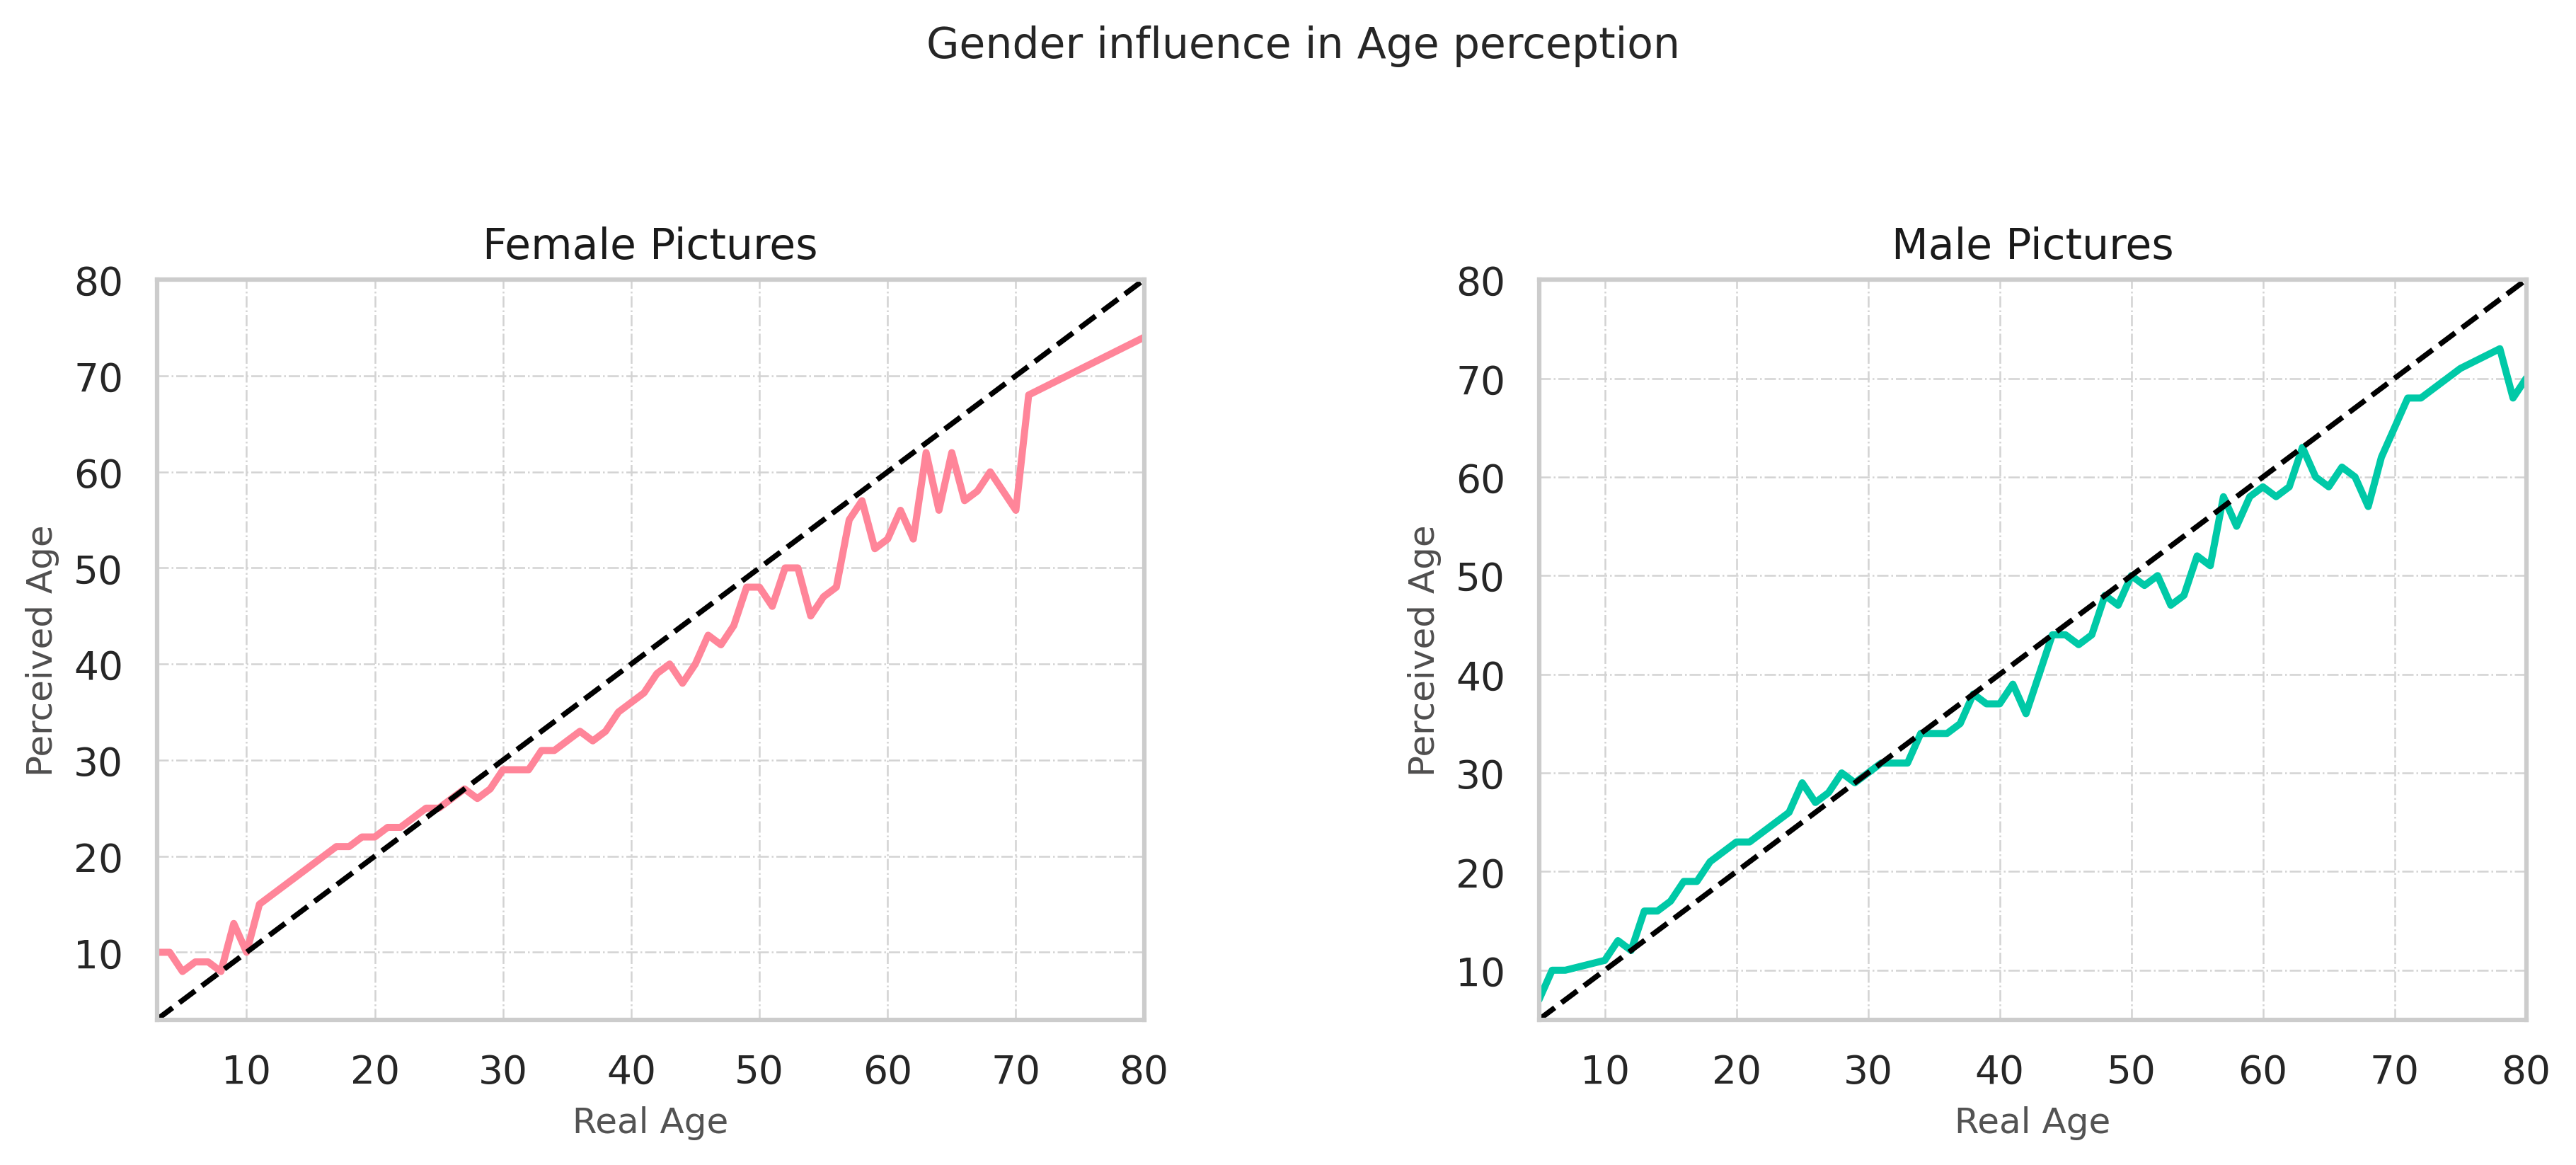

In [49]:
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 360
fig= plt.figure(3, figsize=(12,10))
the_grid = gridspec.GridSpec(2, 2)

#plt.figure(figsize=(10,5))

#Give space between the subplots 
fig.subplots_adjust(hspace=0.6, wspace=0.4)

plt.subplot(the_grid[0, 0])

sns.lineplot(x="age_r",y="ageG", linewidth=2,  data = female_picture ,color="#ff8599")

lineStart = female_picture["age_r"].min() 
lineEnd = 80
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'BLACK', ls="--")
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.grid(True, color = "lightgrey", linewidth = "0.5", linestyle = "-.") 

#style
plt.xlabel(" Real Age ", alpha=0.75, size=10, color= "k" )
plt.ylabel('Perceived Age', size=10, color='#4f4e4e')
plt.title("Female Pictures", fontsize = 12, color ="k", )

plt.subplot(the_grid[0, 1])


sns.lineplot(x="age_r",y="ageG", linewidth=2, data = male_picture ,color="#00c9a7")

lineStart = male_picture["age_r"].min() 
lineEnd = 80
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'BLACK', ls="--")
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.grid(True, color = "lightgrey", linewidth = "0.5", linestyle = "-.")

#style
plt.xlabel(" Real Age ", alpha=0.75, size=10, color= "k" )
plt.ylabel('Perceived Age', size=10, color='#4f4e4e')
plt.title("Male Pictures", fontsize = 12, color ="k", )



#sns.lineplot(x="Month",y="Heat Loss",data = male_picture ,color ="RED")
#big title
plt.suptitle('Gender influence in Age perception', fontsize=12, )

### Ethinicity, gender in age percepcion

In [50]:
f_ethnic_picture = photos_guess[photos_guess['gender_p'] == 'Female'].groupby(['ethn_p', 'age_r']).agg({"ageG": "mean","age_copy":"mean", 'E_abs': "mean" }).round()
f_ethnic_picture = f_ethnic_picture.reset_index()
#female_picture .columns = [' '.join(col) for col in female_picture.columns.values]
f_ethnic_picture


ethn_p  age_r  ageG  age_copy  E_abs
0    Asian     11  16.0        11    5.0
1    Asian     12  18.0        12    6.0
2    Asian     13  16.0        13    4.0
3    Asian     14  16.0        14    3.0
4    Asian     15  18.0        15    4.0
..     ...    ...   ...       ...    ...
210  Other     46  38.0        46    9.0
211  Other     47  34.0        47   13.0
212  Other     53  53.0        53    3.0
213  Other     62  41.0        62   21.0
214  Other     67  55.0        67   12.0

[215 rows x 5 columns]

In [51]:
#_ethnic_picture1 = f_ethnic_picture.groupby(['ethn_p','age_r'] ).agg({"ageG": "mean","age_copy":"mean" }).round()
#f_ethnic_picture1

In [52]:
#male 
m_ethnic_picture = photos_guess[photos_guess['gender_p'] == 'Male'].groupby(['ethn_p', 'age_r']).agg({"ageG": "mean","age_copy":"mean", 'E_abs': "mean" }).round()
m_ethnic_picture = m_ethnic_picture.reset_index()
#female_picture .columns = [' '.join(col) for col in female_picture.columns.values]
m_ethnic_picture


ethn_p  age_r  ageG  age_copy  E_abs
0    Asian     13  20.0        13    7.0
1    Asian     14  19.0        14    6.0
2    Asian     15  17.0        15    3.0
3    Asian     16  21.0        16    6.0
4    Asian     17  20.0        17    4.0
..     ...    ...   ...       ...    ...
181  Other     48  39.0        48    9.0
182  Other     52  50.0        52    4.0
183  Other     53  54.0        53    4.0
184  Other     54  43.0        54   11.0
185  Other     57  60.0        57    4.0

[186 rows x 5 columns]

In [109]:
#from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

Text(0.5, 0.98, 'How old do I look if I am a women or male? ')

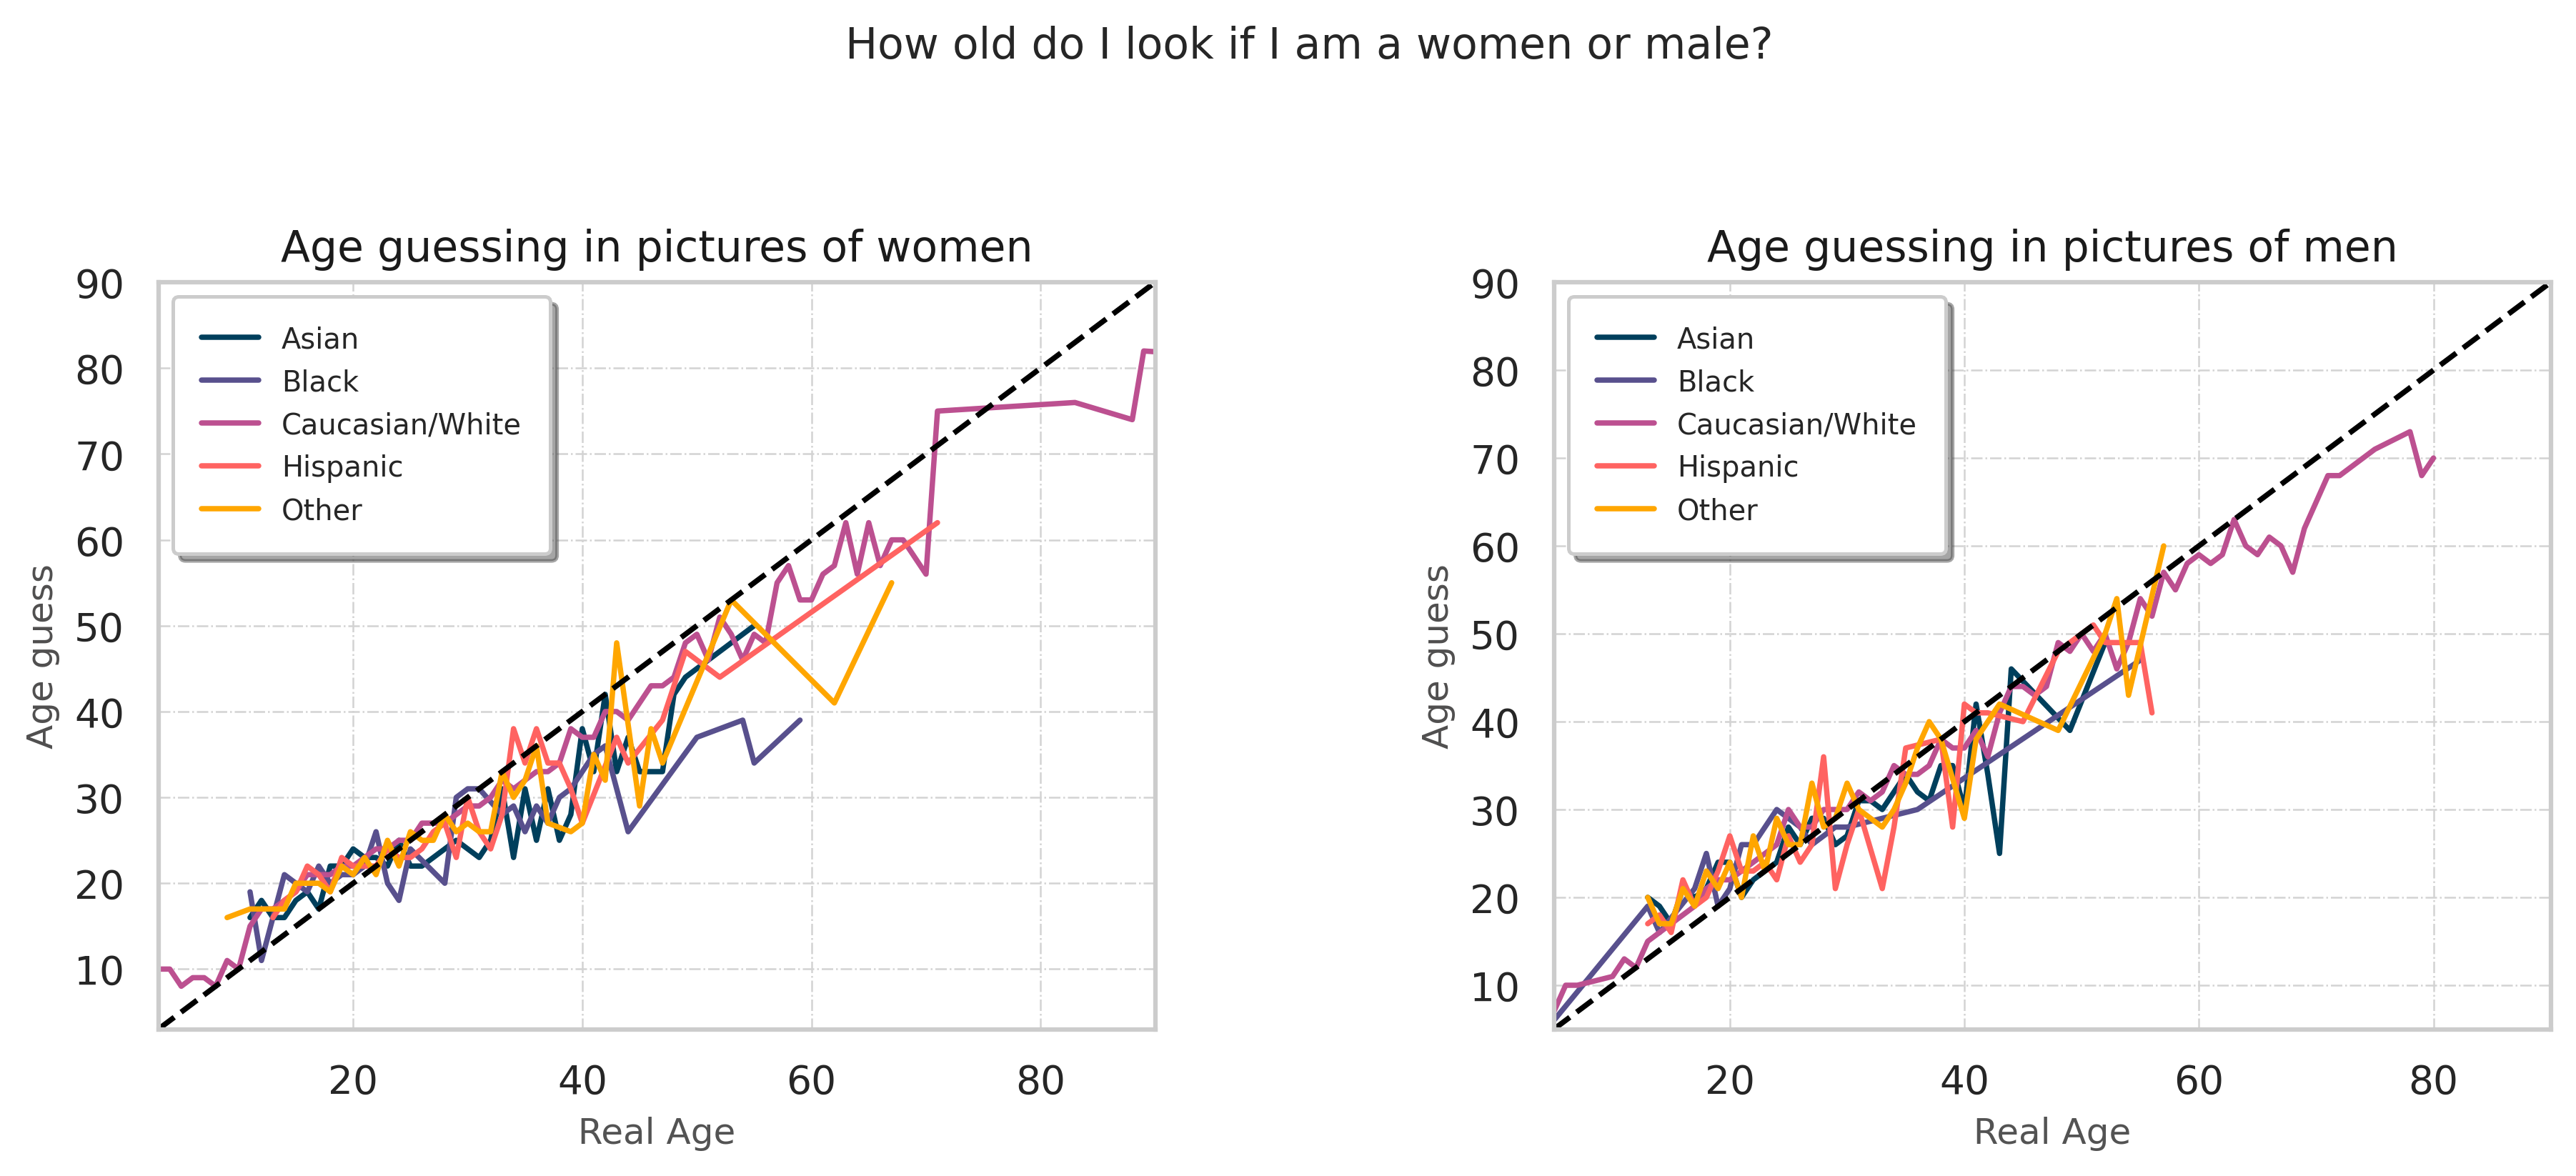

In [55]:
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 360
fig= plt.figure(3, figsize=(12,10))
the_grid = gridspec.GridSpec(2, 2)


#the_grid = gridspec.GridSpec(2, 2)
custom_palette = ["#003f5c", "#58508d","#bc5090", "#ff6361", "#ffa600"]


#Give space between the subplots 
fig.subplots_adjust(hspace=0.6, wspace=0.4)


#plot 1

plt.subplot(the_grid[0, 0])

sns.set_palette(custom_palette)
sns.lineplot(x="age_r",y="ageG", hue='ethn_p',  data = f_ethnic_picture)

#plot diagonal
lineStart = f_ethnic_picture["age_r"].min() 
lineEnd = 90 
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'BLACK', ls="--")
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)


#style
plt.xlabel(" Real Age ", alpha=0.75, size=10, color= "k" )
plt.ylabel('Age guess', size=10, color='#4f4e4e')
plt.title("Age guessing in pictures of women", fontsize = 12, color ="k", )
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize=8 )
plt.grid(True, color = "lightgrey", linewidth = "0.5", linestyle = "-.") 


#plot 2

plt.subplot(the_grid[0, 1])

sns.set_palette(custom_palette) #"BrBG"

sns.lineplot(x="age_r",y="ageG", hue='ethn_p', data = m_ethnic_picture)


#plot diagonal
lineStart = m_ethnic_picture["age_r"].min() 
lineEnd =  90
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'BLACK', ls="--")
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)


#style
plt.xlabel(" Real Age ", alpha=0.75, size=10, color= "k" )
plt.ylabel('Age guess', size=10, color='#4f4e4e')
plt.title("Age guessing in pictures of men", fontsize = 12, color ="k", )
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize=8 )
plt.grid(True, color = "lightgrey", linewidth = "0.5", linestyle = "-.") 


#big title
plt.suptitle('How old do I look if I am a women or male? ', fontsize=12, )



## Calculating the MEA for gender and ethnicity

In [56]:
#Mean prediction by gender 
mean_gender = photos_guess.groupby('gender_p')["E_abs"].mean().round(2)
print("This is the mean prediction by gender", mean_gender )

This is the mean prediction by gender gender_p
Female    5.54
Male      5.03
Name: E_abs, dtype: float64


In [57]:
#Mean prediction by ethinicity  
mean_ethnic = photos_guess.groupby('ethn_p')["E_abs"].mean().round(2)
print("This is the mean prediction by ethnicity", mean_ethnic )

This is the mean prediction by ethnicity ethn_p
Asian              5.68
Black              6.02
Caucasian/White    5.31
Hispanic           5.07
Other              5.33
Name: E_abs, dtype: float64


In [58]:
#Mean error by gender 
error_gender = photos_guess.groupby('gender_p')["Error"].mean().round(2)
print("This is the mean prediction by gender", error_gender )

This is the mean prediction by gender gender_p
Female   -0.26
Male      0.24
Name: Error, dtype: float64


In [59]:
#Mean error by ethinicity  
error_ethnic = photos_guess.groupby('ethn_p')["Error"].mean().round(2)
print("This is the mean prediction by ethnicity", error_ethnic )

This is the mean prediction by ethnicity ethn_p
Asian             -0.92
Black             -0.30
Caucasian/White    0.04
Hispanic          -0.12
Other             -0.38
Name: Error, dtype: float64


## Merging the df-Gamers in the last dataframe merged

In [61]:
#I used this dataframe because it has drop the outliers about gamers born before 1924 
gamer_c1.columns

Index(['uid', 'g', 'ng', 'gender', 'ethnicity', 'birth_country', 'birth_year'], dtype='object')

In [62]:
photos_guess.columns

Index(['photo_id', 'age_r', 'gender_p', 'ethn_p', 'birth_c_p', 'birth_y_p',
       'uid', 'guess_id', 'ageG', 'Error', 'age_copy', 'E_abs'],
      dtype='object')

In [63]:
photos_guess_gamers = photos_guess.merge(gamer_c1, how="left", left_on=['uid'], right_on=['uid'])
photos_guess_gamers

photo_id  age_r gender_p           ethn_p      birth_c_p  birth_y_p  \
0           5204     23   Female  Caucasian/White        Croatia     1983.0   
1           5204     23   Female  Caucasian/White        Croatia     1983.0   
2           5204     23   Female  Caucasian/White        Croatia     1983.0   
3           5204     23   Female  Caucasian/White        Croatia     1983.0   
4           5204     23   Female  Caucasian/White        Croatia     1983.0   
...          ...    ...      ...              ...            ...        ...   
215971    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
215972    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
215973    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
215974    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
215975    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   

           uid  guess_id  ageG  Error  age_copy  E_abs     g     ng  gender  \
0          8.0     507.0  24.0    1.0        23    1.0   2.0   47.0    Male   
1         23.0     516.0  20.0   -3.0        23    3.0   1.0   11.0    Male   
2         13.0     524.0  20.0   -3.0        23    3.0   9.0   62.0    Male   
3         14.0     538.0  19.0   -4.0        23    4.0  14.0   72.0     NaN   
4         24.0     543.0  25.0    2.0        23    2.0   3.0   13.0     NaN   
...        ...       ...   ...    ...       ...    ...   ...    ...     ...   
215971  4432.0  254911.0  24.0   -4.0        28    4.0   0.0    6.0  Female   
215972  3422.0  254990.0  26.0   -2.0        28    2.0   4.0  112.0    Male   
215973  4376.0  255066.0  22.0   -6.0        28    6.0  51.0  578.0    Male   
215974  4427.0  255085.0  21.0   -7.0        28    7.0   2.0   11.0    Male   
215975  4434.0  255112.0  19.0   -9.0        28    9.0   3.0   19.0  Female   

              ethnicity   birth_country  birth_year  
0       Caucasian/White          France         NaN  
1       Caucasian/White          France         NaN  
2       Caucasian/White   United States         NaN  
3                   NaN             NaN         NaN  
4                   NaN             NaN         NaN  
...                 ...             ...         ...  
215971            Asian           China      1985.0  
215972  Caucasian/White  United Kingdom      1953.0  
215973            Asian        Thailand      1993.0  
215974  Caucasian/White        Portugal      2001.0  
215975  Caucasian/White     Netherlands      2005.0  

[215976 rows x 18 columns]

## Name of the MAIN df with all the variables use in this analysis : photos_guess_gamers

In [64]:
df_final = photos_guess_gamers.copy()
df_final.head()

photo_id  age_r gender_p           ethn_p birth_c_p  birth_y_p   uid  \
0      5204     23   Female  Caucasian/White   Croatia     1983.0   8.0   
1      5204     23   Female  Caucasian/White   Croatia     1983.0  23.0   
2      5204     23   Female  Caucasian/White   Croatia     1983.0  13.0   
3      5204     23   Female  Caucasian/White   Croatia     1983.0  14.0   
4      5204     23   Female  Caucasian/White   Croatia     1983.0  24.0   

   guess_id  ageG  Error  age_copy  E_abs     g    ng gender        ethnicity  \
0     507.0  24.0    1.0        23    1.0   2.0  47.0   Male  Caucasian/White   
1     516.0  20.0   -3.0        23    3.0   1.0  11.0   Male  Caucasian/White   
2     524.0  20.0   -3.0        23    3.0   9.0  62.0   Male  Caucasian/White   
3     538.0  19.0   -4.0        23    4.0  14.0  72.0    NaN              NaN   
4     543.0  25.0    2.0        23    2.0   3.0  13.0    NaN              NaN   

   birth_country  birth_year  
0         France         NaN  
1         France         NaN  
2  United States         NaN  
3            NaN         NaN  
4            NaN         NaN

In [65]:
# adding column "age_range" for the Age guess
# adding column " decade" for the birth_year of the gamers

In [66]:
# Range of Age people in images
maxi = df_final['age_r'].max()
mini = df_final['age_r'].min()
print ("The Age Range in the pictures is between", mini, "-", maxi)

The Age Range in the pictures is between 3 - 100


In [67]:
# Range of Age people in images
maxi = df_final['birth_year'].max()
mini = df_final['birth_year'].min()
print ("The birth year of gameres is between", mini, "-", maxi)

The birth year of gameres is between 1934.0 - 2014.0


In [68]:
#creating a new column  "age_group". This variable is the range of the Real Age

# creating the Age range
bins= [0,10,20,30,40, 50, 60, 70, 80, 90, 100]
labels = ['0-10',"10-20",'20-30','30-40','40-50', "50-60", "60-70", "70-80", "80-90", "90-100"]
df_final['age_group'] = pd.cut(df_final['age_r'], bins=bins, labels=labels, right=False)


In [71]:
#create a new colum decade for birth_guess (birt_year)
df_final['decade'] = 10 * (df_final['birth_year'] // 10)

In [72]:
df_final.tail()

photo_id  age_r gender_p           ethn_p      birth_c_p  birth_y_p  \
215971    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
215972    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
215973    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
215974    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   
215975    255075     28   Female  Caucasian/White  Faroe Islands     1990.0   

           uid  guess_id  ageG  Error  age_copy  E_abs     g     ng  gender  \
215971  4432.0  254911.0  24.0   -4.0        28    4.0   0.0    6.0  Female   
215972  3422.0  254990.0  26.0   -2.0        28    2.0   4.0  112.0    Male   
215973  4376.0  255066.0  22.0   -6.0        28    6.0  51.0  578.0    Male   
215974  4427.0  255085.0  21.0   -7.0        28    7.0   2.0   11.0    Male   
215975  4434.0  255112.0  19.0   -9.0        28    9.0   3.0   19.0  Female   

              ethnicity   birth_country  birth_year age_group  decade  
215971            Asian           China      1985.0     20-30  1980.0  
215972  Caucasian/White  United Kingdom      1953.0     20-30  1950.0  
215973            Asian        Thailand      1993.0     20-30  1990.0  
215974  Caucasian/White        Portugal      2001.0     20-30  2000.0  
215975  Caucasian/White     Netherlands      2005.0     20-30  2000.0

### People in picture clasified by age range

In [73]:
d_agegroup_photos = df_final.groupby(['age_group'])["age_r"].count()
d_agegroup_photos

age_group
0-10        730
10-20     52100
20-30     70831
30-40     48585
40-50     27563
50-60     11234
60-70      3901
70-80       845
80-90       167
90-100        0
Name: age_r, dtype: int64

Guessers clasified by the decade they born

In [74]:
d_agedecade_users = df_final.groupby(['decade'])["age_r"].count()
d_agedecade_users

decade
1930.0      199
1940.0     2412
1950.0    10093
1960.0    19914
1970.0    36639
1980.0    58035
1990.0    63145
2000.0    10650
2010.0     1420
Name: age_r, dtype: int64

### How is the accuracy of Women Age Guess by Women?

In [110]:
df_final.gender.unique()

array(['Male', nan, 'Female'], dtype=object)

In [111]:
#for do this analysis is necesary to do 2 dataframes, photos of female guess by females, and other photos of female guess by males

female guessing by female

In [76]:
female_guess = df_final[df_final['gender'] == 'Female'].groupby(["gender_p", 'age_r']).agg({"ageG": "mean", "age_copy":"mean", "E_abs": "mean"}).round()
female_guess = female_guess.reset_index()
#female_picture .columns = [' '.join(col) for col in female_picture.columns.values]
female_guess

gender_p  age_r  ageG  age_copy  E_abs
0     Female      3  10.0         3    7.0
1     Female      4  10.0         4    6.0
2     Female      5   8.0         5    3.0
3     Female      6   9.0         6    3.0
4     Female      7   9.0         7    2.0
..       ...    ...   ...       ...    ...
137     Male     72  68.0        72    5.0
138     Male     75  72.0        75    5.0
139     Male     78  74.0        78    5.0
140     Male     79  69.0        79   10.0
141     Male     80  70.0        80   10.0

[142 rows x 5 columns]

female guessing by male

In [77]:
male_guess = df_final[df_final['gender'] == 'Male'].groupby(["gender_p", 'age_r']).agg({"ageG": "mean", "age_copy":"mean", "E_abs": "mean"}).round()
male_guess = male_guess.reset_index()
#female_picture .columns = [' '.join(col) for col in female_picture.columns.values]
male_guess

gender_p  age_r  ageG  age_copy  E_abs
0     Female      3  10.0         3    7.0
1     Female      4  10.0         4    6.0
2     Female      5   8.0         5    3.0
3     Female      6   9.0         6    3.0
4     Female      7  10.0         7    4.0
..       ...    ...   ...       ...    ...
137     Male     72  66.0        72    6.0
138     Male     75  71.0        75    7.0
139     Male     78  72.0        78    6.0
140     Male     79  68.0        79   11.0
141     Male     80  71.0        80   10.0

[142 rows x 5 columns]

Text(0.5, 0.98, 'Age guessing is the same for males and females ')

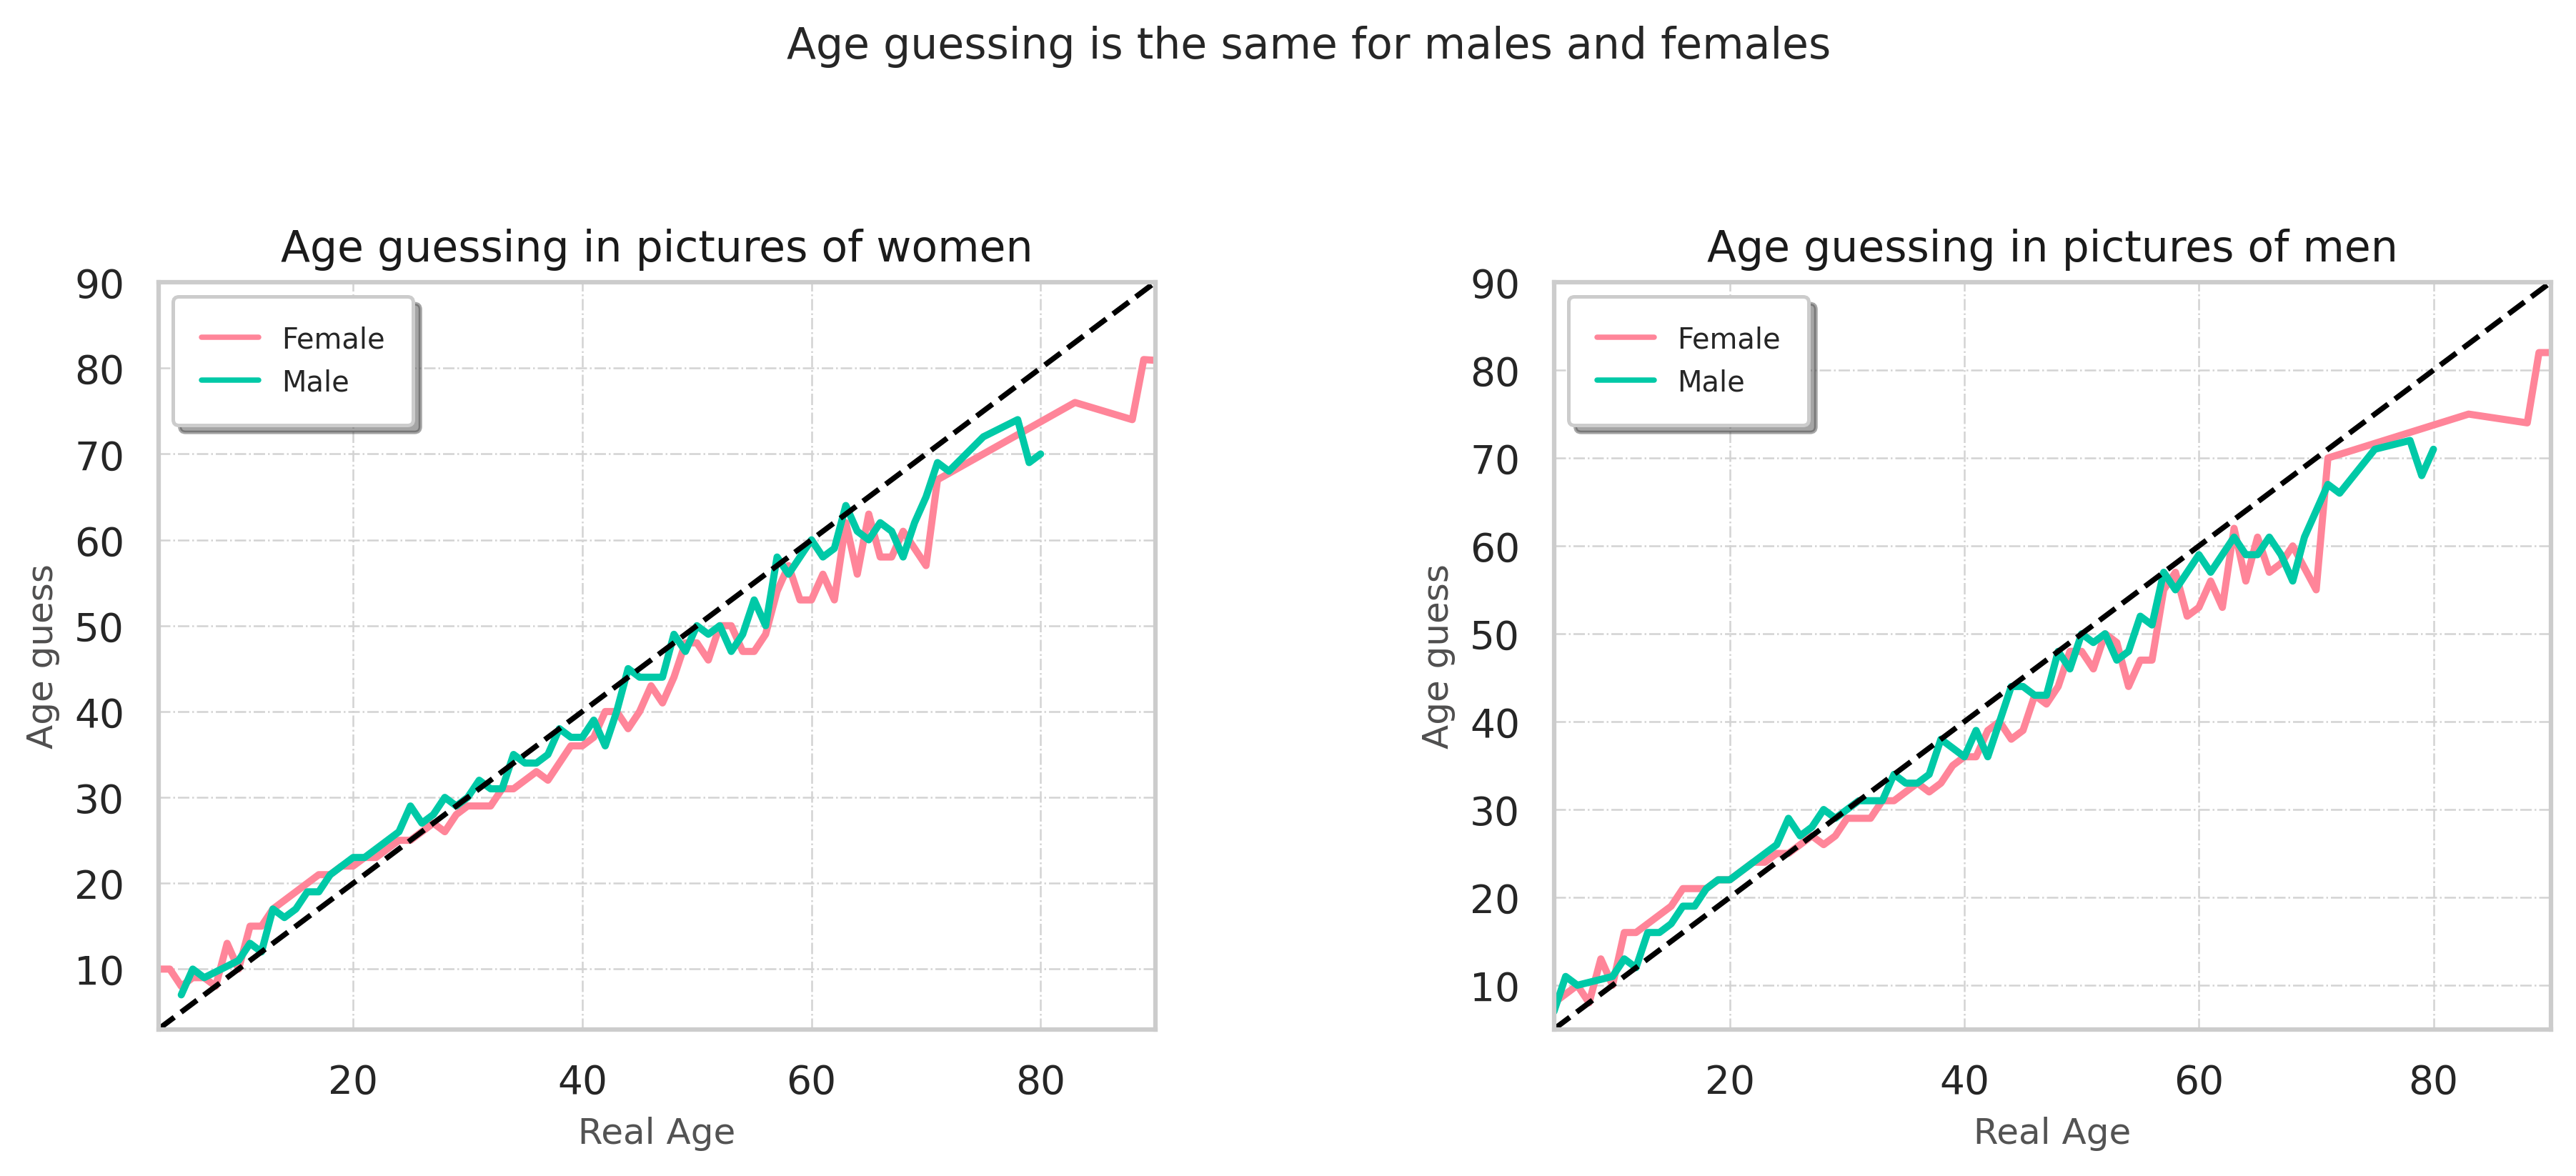

In [112]:
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 360
fig= plt.figure(3, figsize=(12,10))
the_grid = gridspec.GridSpec(2, 2)


#the_grid = gridspec.GridSpec(2, 2)
custom_palette = ['#ff8599', '#00c9a7']

#Give space between the subplots 
fig.subplots_adjust(hspace=0.6, wspace=0.4)


#plot 1
plt.subplot(the_grid[0, 0])

#setting the color
sns.set_palette(custom_palette)

sns.lineplot(x="age_r",y="ageG", linewidth=2, hue='gender_p',  data = female_guess )
#plot diagonal
lineStart = f_ethnic_picture["age_r"].min() 
lineEnd = 90 
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'BLACK', ls="--")
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)


#style
plt.xlabel(" Real Age ", alpha=0.75, size=10, color= "k" )
plt.ylabel('Age guess', size=10, color='#4f4e4e')
plt.title("Age guessing in pictures of women", fontsize = 12, color ="k", )
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize=8 )
plt.grid(True, color = "lightgrey", linewidth = "0.5", linestyle = "-.") 


#plot 2
plt.subplot(the_grid[0, 1])

sns.set_palette(custom_palette) #"BrBG"

sns.lineplot(x="age_r",y="ageG",linewidth=2, hue='gender_p', data = male_guess )

#plot diagonal
lineStart = m_ethnic_picture["age_r"].min() 
lineEnd =  90
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'BLACK', ls="--")
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)


#style
plt.xlabel(" Real Age ", alpha=0.75, size=10, color= "k" )
plt.ylabel('Age guess', size=10, color='#4f4e4e')
plt.title("Age guessing in pictures of men", fontsize = 12, color ="k", )
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize=8 )
plt.grid(True, color = "lightgrey", linewidth = "0.5", linestyle = "-.") 


#big title
plt.suptitle('Age guessing is the same for males and females ', fontsize=12, )



In [79]:
## race vs race


In [113]:
df_final.gender.unique()

array(['Male', nan, 'Female'], dtype=object)

In [114]:
df_final.columns

Index(['photo_id', 'age_r', 'gender_p', 'ethn_p', 'birth_c_p', 'birth_y_p',
       'uid', 'guess_id', 'ageG', 'Error', 'age_copy', 'E_abs', 'g', 'ng',
       'gender', 'ethnicity', 'birth_country', 'birth_year', 'age_group',
       'decade'],
      dtype='object')

In [117]:
Error_females_g = df_final[df_final['gender'] == 'Female'].groupby(['ethn_p', 'age_r']).agg({"ageG": "mean", "age_copy":"mean", "E_abs": "mean"}).round()
Error_females_g = Error_females_g.reset_index()
Error_females_g.head(4)

ethn_p  age_r  ageG  age_copy  E_abs
0  Asian     11  16.0        11    5.0
1  Asian     12  18.0        12    6.0
2  Asian     13  18.0        13    5.0
3  Asian     14  17.0        14    4.0

## Age women in pictures guess by women and men represented in the entire age range

This analyses is to see the difference of the error between all the age guessing 

In [84]:
df_final.columns

Index(['photo_id', 'age_r', 'gender_p', 'ethn_p', 'birth_c_p', 'birth_y_p',
       'uid', 'guess_id', 'ageG', 'Error', 'age_copy', 'E_abs', 'g', 'ng',
       'gender', 'ethnicity', 'birth_country', 'birth_year', 'age_group',
       'decade'],
      dtype='object')

In [86]:
Error_females_pg = df_final[df_final['gender_p'] == 'Female'].groupby(['gender','ethn_p', 'age_r']).agg({"ageG": "mean", "age_copy":"mean", "E_abs": "mean"}).round()
Error_females_pg = Error_females_pg.reset_index()
Error_females_pg

gender ethn_p  age_r  ageG  age_copy  E_abs
0    Female  Asian     11  16.0        11    5.0
1    Female  Asian     12  18.0        12    6.0
2    Female  Asian     13  16.0        13    3.0
3    Female  Asian     14  16.0        14    3.0
4    Female  Asian     15  18.0        15    4.0
..      ...    ...    ...   ...       ...    ...
425    Male  Other     46  40.0        46    8.0
426    Male  Other     47  35.0        47   12.0
427    Male  Other     53  51.0        53    4.0
428    Male  Other     62  43.0        62   19.0
429    Male  Other     67  54.0        67   13.0

[430 rows x 6 columns]

In [87]:
# women picture guess by women 

In [119]:
Error_females_w = Error_females_pg[Error_females_pg['gender'] == 'Female'].groupby(['age_r']).agg({"ageG": "mean", "age_copy":"mean", "E_abs": "mean"}).round()
Error_females_w = Error_females_w.reset_index()
Error_females_w.head ()

age_r  ageG  age_copy  E_abs
0      3  10.0         3    7.0
1      4  10.0         4    6.0
2      5   8.0         5    3.0
3      6   9.0         6    3.0
4      7   9.0         7    2.0

In [89]:
# women picture guess by men

In [120]:
Error_females_m = Error_females_pg[Error_females_pg['gender'] == 'Male'].groupby(['age_r']).agg({"ageG": "mean", "age_copy":"mean", "E_abs": "mean"}).round()
Error_females_m = Error_females_m.reset_index()
Error_females_m.head()

age_r  ageG  age_copy  E_abs
0      3  10.0         3    7.0
1      4  10.0         4    6.0
2      5   8.0         5    3.0
3      6   9.0         6    3.0
4      7  10.0         7    4.0

AttributeError: module 'matplotlib.pyplot' has no attribute 'xticklabels'

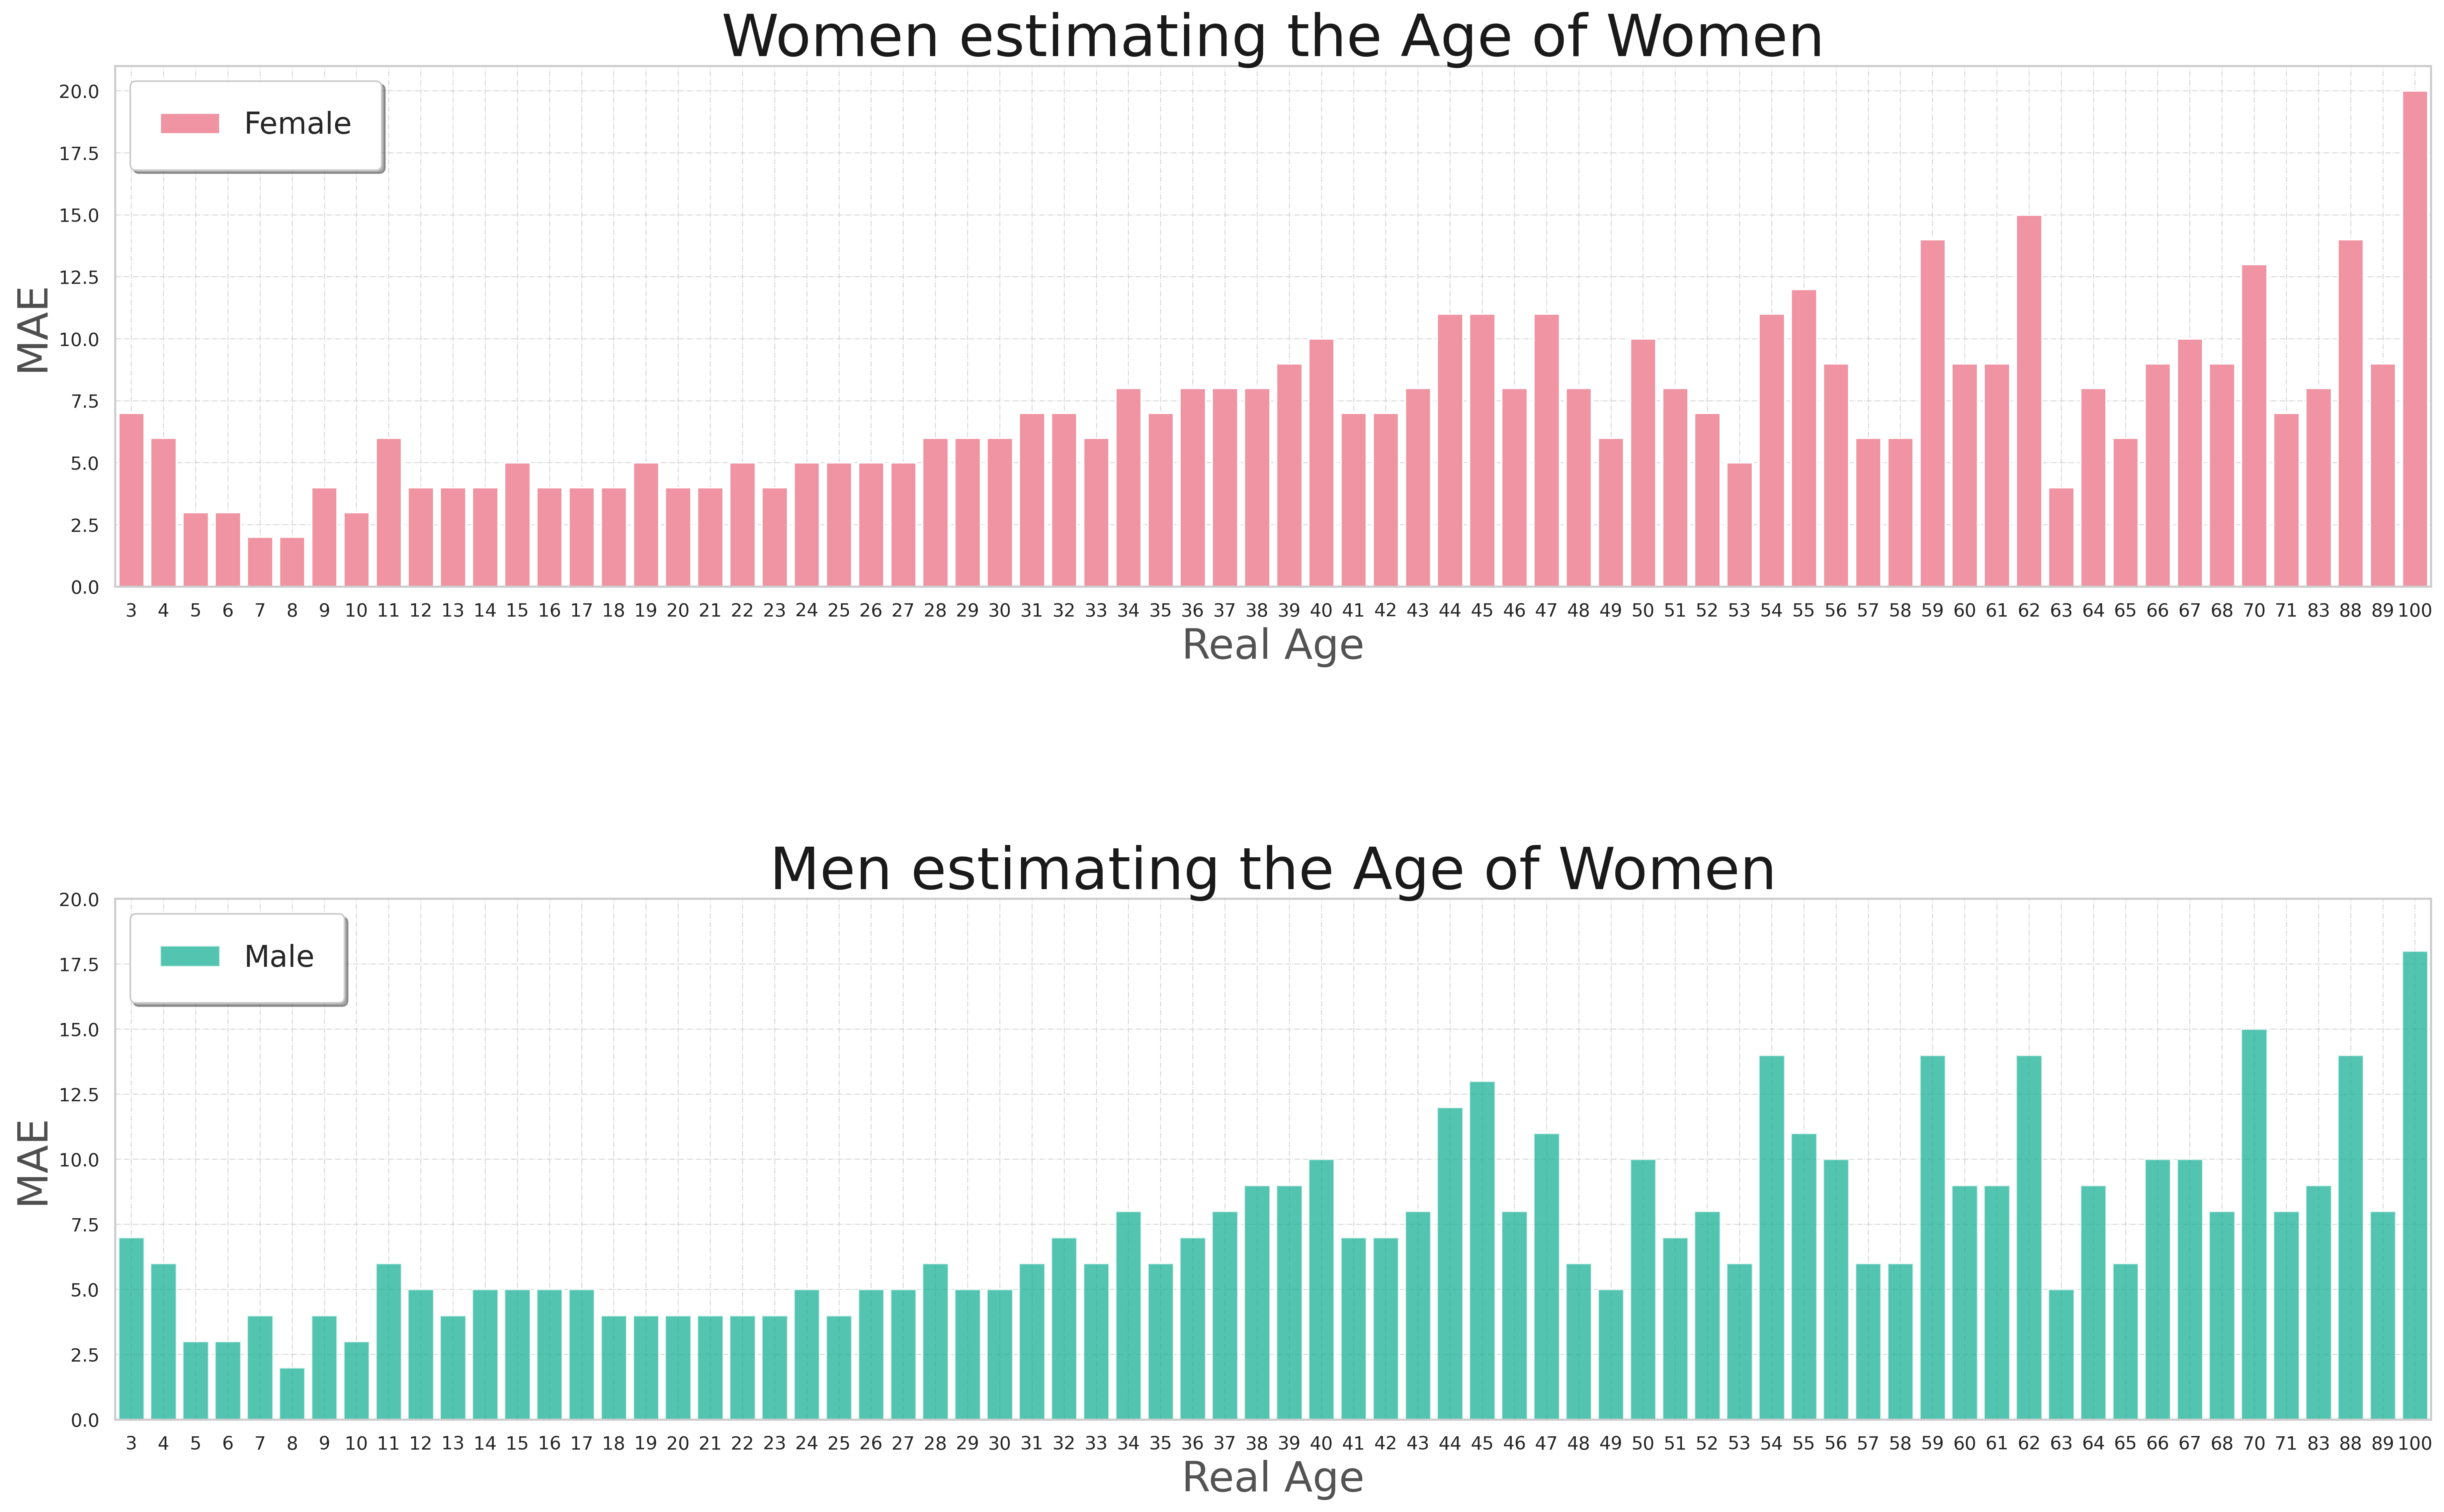

In [129]:
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 360
fig= plt.figure(figsize=(60,15))
the_grid = gridspec.GridSpec(2, 2)
custom_palette = ["#003f5c", "#58508d","#bc5090", "#ff6361", "#ffa600"]


#Give space between the subplots 
fig.subplots_adjust(hspace=0.6, wspace=0.4)


#plot 1
plt.subplot(the_grid[0, 1])

sns.set_palette(custom_palette)
sns.barplot(x="age_r",y="E_abs",  data = Error_females_w, color = '#ff8599', label = "Female" )

#hue='ethn_p' this is if you need to add hue

#style
plt.xlabel(" Real Age ", alpha=0.75, size=25, color= "k" )
plt.ylabel('MAE', size=25, color='#4f4e4e')
plt.title("Women estimating the Age of Women", fontsize = 35, color ="k", )
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize=18 )
plt.grid(True, color = "lightgrey", linewidth = "0.5", linestyle = "-.") 

#plot 2
plt.subplot(the_grid[1, 1])

sns.set_palette(custom_palette) #"BrBG"
sns.barplot(x="age_r",y="E_abs", data = Error_females_m, alpha=0.75, color = "#00c9a7", label= "Male")
#hue='ethn_p'


#style
plt.xlabel(" Real Age ", alpha=0.75, size=25, color= "k" )
plt.ylabel('MAE', size=25, color='#4f4e4e')
plt.title("Men estimating the Age of Women", fontsize = 35, color ="k", )
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize=18 )
plt.grid(True, color = "lightgrey", linewidth = "0.5", linestyle = "-.") 
plt.ylim([0, 20.0]) #setting the Y label. In this graphs, female graphs are bigger than men. Need to be the same
plt.xticklabels(x_labels)


#big title
plt.suptitle('Target-Bias. Gender differences in estimating the Age of Women', fontsize=40, )

## Males images guessing by female and male

In [125]:
Error_males_pg = df_final[df_final['gender_p'] == 'Male'].groupby(['gender','ethn_p', 'age_r']).agg({"ageG": "mean", "age_copy":"mean", "E_abs": "mean"}).round()
Error_males_pg = Error_males_pg.reset_index()
Error_males_pg.head()

gender ethn_p  age_r  ageG  age_copy  E_abs
0  Female  Asian     13  20.0        13    7.0
1  Female  Asian     14  19.0        14    6.0
2  Female  Asian     15  17.0        15    3.0
3  Female  Asian     16  21.0        16    6.0
4  Female  Asian     17  20.0        17    4.0

In [126]:
Error_males_w = Error_males_pg[Error_males_pg['gender'] == 'Female'].groupby(['age_r']).agg({"ageG": "mean", "age_copy":"mean", "E_abs": "mean"}).round()
Error_males_w= Error_males_w.reset_index()
#Error_males_w

In [127]:
Error_males_m = Error_males_pg[Error_males_pg['gender'] == 'Male'].groupby(['age_r']).agg({"ageG": "mean", "age_copy":"mean", "E_abs": "mean"}).round()
Error_males_m = Error_males_m.reset_index()
#Error_males_m

AttributeError: module 'matplotlib.pyplot' has no attribute 'xticklabels'

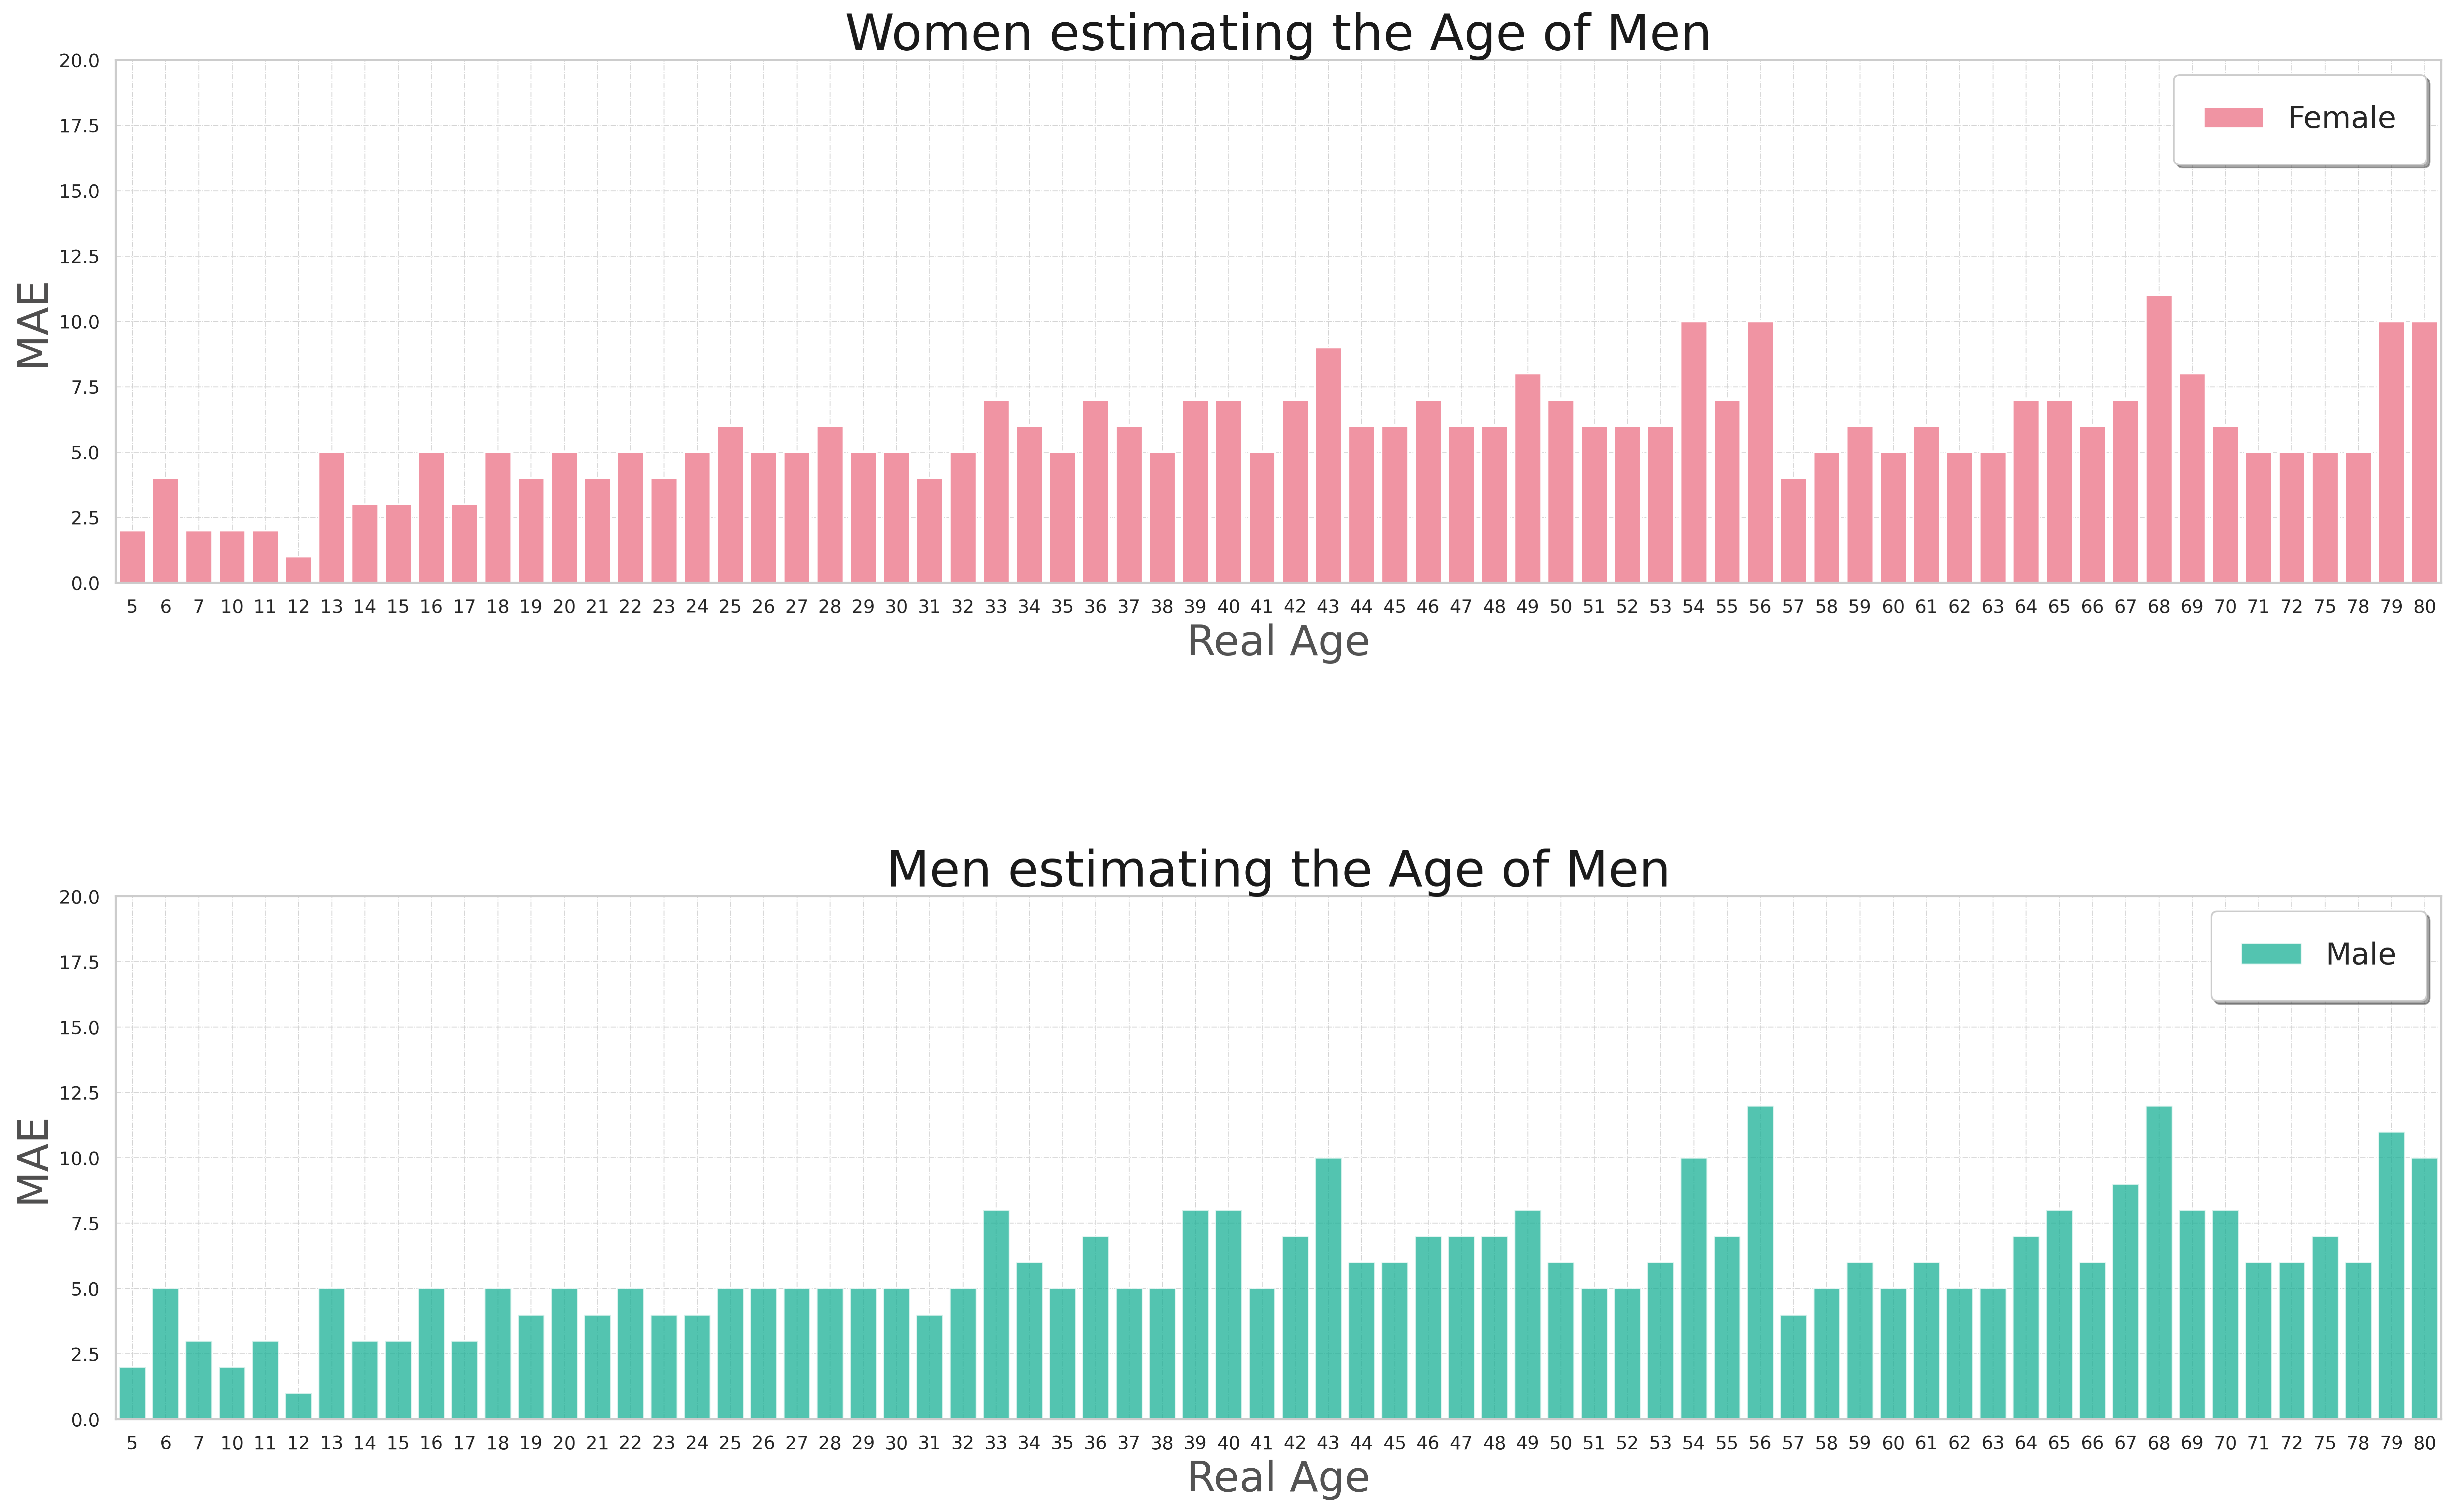

In [128]:
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 360
plt.rcParams['figure.dpi'] = 360
fig= plt.figure(figsize=(60,15))
the_grid = gridspec.GridSpec(2, 2)


#the_grid = gridspec.GridSpec(2, 2)
custom_palette = ["#003f5c", "#58508d","#bc5090", "#ff6361", "#ffa600"]


#Give space between the subplots 
fig.subplots_adjust(hspace=0.6, wspace=0.4)


#plot 1
plt.subplot(the_grid[0, 1])

sns.set_palette(custom_palette)
sns.barplot(x="age_r",y="E_abs",  data = Error_males_w, color = '#ff8599', label = "Female" )
#hue='ethn_p'

#style
plt.xlabel(" Real Age ", alpha=0.75, size=25, color= "k" )
plt.ylabel('MAE', size=25, color='#4f4e4e')
plt.title("Women estimating the Age of Men", fontsize = 30, color ="k", )
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize=18 )
plt.grid(True, color = "lightgrey", linewidth = "0.5", linestyle = "-.") 
plt.ylim([0, 20.0])

#plot 2
plt.subplot(the_grid[1, 1])

sns.set_palette(custom_palette) #"BrBG"
sns.barplot(x="age_r",y="E_abs", data = Error_males_m, alpha=0.75, color = "#00c9a7", label= "Male")
#hue='ethn_p'

x_labels = ["1","20","30","40", "50","60","70", "80", "90"]
#style
plt.xlabel(" Real Age ", alpha=0.75, size=25, color= "k" )
plt.ylabel('MAE', size=25, color='#4f4e4e')
plt.title("Men estimating the Age of Men", fontsize = 30, color ="k", )
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize=18 )
plt.grid(True, color = "lightgrey", linewidth = "0.5", linestyle = "-.") 
plt.ylim([0, 20.0]) #setting the Y label
plt.xticklabels(x_labels)


#big title
plt.suptitle('Target-Bias. Gender differences estimating the Age of Men ', fontsize=40, )

## Age estimation by ethinicity by observers clasified by ethnic groups

In [132]:
df_final.columns

Index(['photo_id', 'age_r', 'gender_p', 'ethn_p', 'birth_c_p', 'birth_y_p',
       'uid', 'guess_id', 'ageG', 'Error', 'age_copy', 'E_abs', 'g', 'ng',
       'gender', 'ethnicity', 'birth_country', 'birth_year', 'age_group',
       'decade'],
      dtype='object')

In [133]:
df_final.ethn_p.unique()

array(['Caucasian/White', 'Hispanic', 'Black', 'Other', 'Asian'],
      dtype=object)

In [136]:
Error_females_pg = df_final[df_final['gender_p'] == 'Female'].groupby(['gender','ethn_p', 'age_r']).agg({"ageG": "mean", "age_copy":"mean", "E_abs": "mean"}).round()
Error_females_pg = Error_females_pg.reset_index()
Error_females_pg. head()



gender ethn_p  age_r  ageG  age_copy  E_abs
0  Female  Asian     11  16.0        11    5.0
1  Female  Asian     12  18.0        12    6.0
2  Female  Asian     13  16.0        13    3.0
3  Female  Asian     14  16.0        14    3.0
4  Female  Asian     15  18.0        15    4.0

In [139]:
#trying different way to obtaing data
df_ethic_p = df_final["ethn_p"].str.get_dummies(sep=', ')
df_ethic_p 


Asian  Black  Caucasian/White  Hispanic  Other
0           0      0                1         0      0
1           0      0                1         0      0
2           0      0                1         0      0
3           0      0                1         0      0
4           0      0                1         0      0
...       ...    ...              ...       ...    ...
215971      0      0                1         0      0
215972      0      0                1         0      0
215973      0      0                1         0      0
215974      0      0                1         0      0
215975      0      0                1         0      0

[215976 rows x 5 columns]

### Selecting data of every ethcnicity in the picture 

In [140]:
Error_caucasian = df_final[df_final['ethn_p'] == 'Caucasian/White'].groupby(['ethnicity', 'age_r']).agg({"ageG": "mean", "age_copy":"mean", "E_abs": "mean"}).round().reset_index()
Error_caucasian.head()

ethnicity  age_r  ageG  age_copy  E_abs
0     Asian      5   8.0         5    3.0
1     Asian      6   9.0         6    3.0
2     Asian      7   9.0         7    2.0
3     Asian      8   7.0         8    2.0
4     Asian      9  11.0         9    3.0

In [141]:
Error_asian1 = df_final[df_final['ethn_p'] == 'Asian'].groupby(['ethnicity']).agg({"E_abs": "mean"}).round(3).reset_index()
Error_asian1.head()


ethnicity  E_abs
0            Asian  5.263
1            Black  5.556
2  Caucasian/White  5.728
3         Hispanic  5.292
4            Other  5.420

In [143]:
Error_black1 = df_final[df_final['ethn_p'] == 'Black'].groupby(['ethnicity']).agg({"E_abs": "mean"}).round(2).reset_index()
Error_black1.head()

ethnicity  E_abs
0            Asian   5.88
1            Black   6.00
2  Caucasian/White   6.01
3         Hispanic   6.13
4            Other   5.29

In [144]:
Error_caucasian1 = df_final[df_final['ethn_p'] == 'Caucasian/White'].groupby(['ethnicity']).agg({"E_abs": "mean"}).round(2).reset_index()
Error_caucasian1

ethnicity  E_abs
0            Asian   5.42
1            Black   5.48
2  Caucasian/White   5.28
3         Hispanic   5.24
4            Other   5.25

In [145]:
Error_hispanic1 = df_final[df_final['ethn_p'] == 'Hispanic'].groupby(['ethnicity']).agg({"E_abs": "mean"}).round(2).reset_index()
Error_hispanic1

ethnicity  E_abs
0            Asian   5.00
1            Black   5.25
2  Caucasian/White   5.08
3         Hispanic   4.64
4            Other   5.07

In [146]:
Error_Other1 = df_final[df_final['ethn_p'] == 'Other'].groupby(['ethnicity']).agg({"E_abs": "mean"}).round(2).reset_index()
Error_Other1

ethnicity  E_abs
0            Asian   5.21
1            Black   5.64
2  Caucasian/White   5.34
3         Hispanic   5.07
4            Other   5.14

In [147]:
#merge the dataframes
#create the library for df
dfs_errors = [Error_asian1, Error_black1, Error_caucasian1, Error_hispanic1, Error_Other1]


In [152]:
k = np.arange(len(dfs_errors)).astype(str)
df1 = pd.concat([x.set_index('ethnicity') for x in dfs_errors ], axis=1, join='inner')
df1 

E_abs  E_abs  E_abs  E_abs  E_abs
ethnicity                                         
Asian            5.263   5.88   5.42   5.00   5.21
Black            5.556   6.00   5.48   5.25   5.64
Caucasian/White  5.728   6.01   5.28   5.08   5.34
Hispanic         5.292   6.13   5.24   4.64   5.07
Other            5.420   5.29   5.25   5.07   5.14

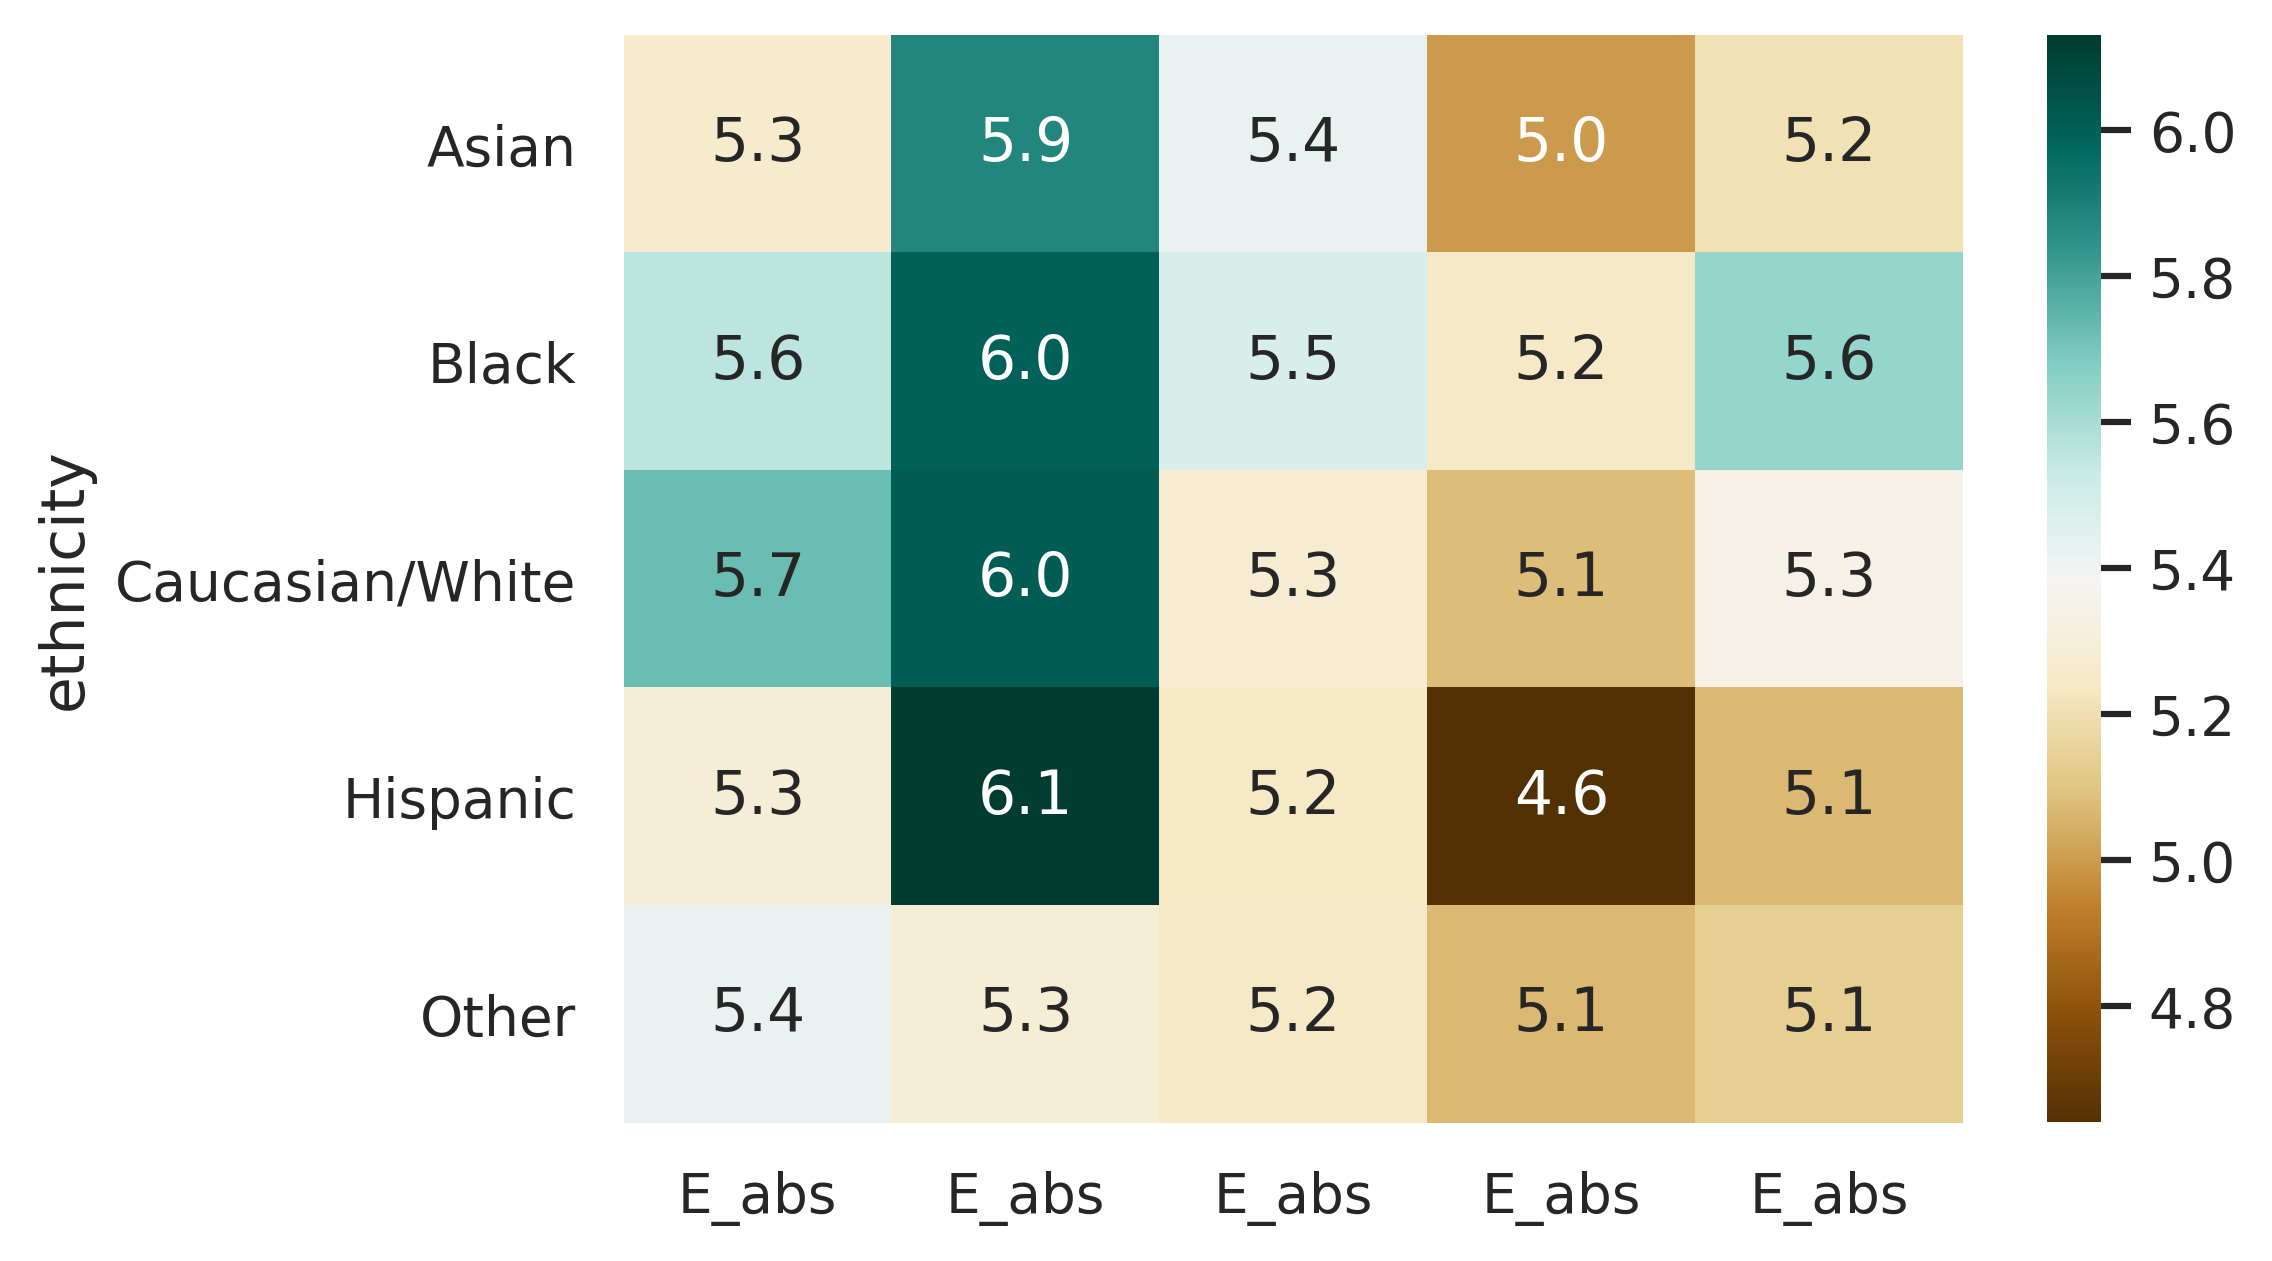

In [153]:
sns.heatmap(df1  , annot=True, fmt=".1f",  cmap = 'BrBG')
plt.show() 

####  Error- lack fo accuracy by ethinicity in the  observers and the picture 

### Is Age guess is incluence by age?

In [175]:
d_agedecade_users = df_final.groupby(['decade'])["age_r"].count()
d_agedecade_users

decade
1930.0      199
1940.0     2412
1950.0    10093
1960.0    19914
1970.0    36639
1980.0    58035
1990.0    63145
2000.0    10650
2010.0     1420
Name: age_r, dtype: int64

In [176]:
df_final['decade'].unique()

array([  nan, 1960., 1980., 1990., 1970., 1950., 2010., 2000., 1940.,
       1930.])

In [177]:
df_final.age_group.unique()

['20-30', '10-20', '60-70', '30-40', '0-10', '40-50', '50-60', '70-80', NaN, '80-90']
Categories (9, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '50-60' < '60-70' < '70-80' < '80-90']

In [161]:
d_age = df_final.copy()

In [178]:
d_age1 = d_age.dropna(axis=0)

In [179]:
d_age1.age_group.unique()

['20-30', '10-20', '60-70', '30-40', '0-10', '40-50', '50-60', '70-80', '80-90']
Categories (9, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '50-60' < '60-70' < '70-80' < '80-90']

In [180]:
d_age1.decade.unique()

array([1960., 1980., 1990., 1970., 1950., 2010., 2000., 1940., 1930.])

### Trying to search for the Error

In [164]:
error_age1 = d_age1.groupby(['decade', "age_group"]).agg({"E_abs": "mean"}).round(2)

In [165]:
error_age1 

E_abs
decade age_group       
1930.0 0-10         NaN
       10-20       3.85
       20-30       4.79
       30-40       4.75
       40-50       9.13
...                 ...
2010.0 50-60       6.64
       60-70       7.97
       70-80       7.67
       80-90        NaN
       90-100       NaN

[90 rows x 1 columns]

The result has NaN values

In [170]:
# Rango de edades de las photos 
Error30_40  = d_age1[d_age1['age_group'] == '30-40'].groupby(['age_group']).agg({"E_abs": "mean"}).round().reset_index()
Error30_40.head()

age_group  E_abs
0      0-10    NaN
1     10-20    NaN
2     20-30    NaN
3     30-40    6.0
4     40-50    NaN

The result has NaN values


In [172]:
#building axis y with Age range
Error50  = df_final[df_final['decade'] == '1950'].groupby(['age_group']).agg({"E_abs": "mean"}).round().reset_index()
Error50.head()

age_group  E_abs
0      0-10    NaN
1     10-20    NaN
2     20-30    NaN
3     30-40    NaN
4     40-50    NaN

The result has NaN values

In [173]:
Error60  = df_final[df_final['decade'] == '1960'].groupby(['age_group']).agg({"E_abs": "mean"}).round().reset_index()
Error60.head()

age_group  E_abs
0      0-10    NaN
1     10-20    NaN
2     20-30    NaN
3     30-40    NaN
4     40-50    NaN

The selection of age range of the people in pictures, or the decade where born the observers shows NaN values. This mean not all the people have been guess picture in all the age range. 
There is lack of data in to have insights if the age influence in the accuracy of age guessing. 

For the above, I decide don't do this analysis. 

All the resuls and comeent of the chart are in the presentation file. This file is in the repository

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=60744b8c-41c2-49e4-8128-b3efebc9abf7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>